<a href="https://colab.research.google.com/github/pierrickBERTHE/Projet6_OCR_DataScientist-/blob/main/berthe_pierrick_3_notebook_classification_122023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='color:SteelBlue'>P6 - Classifiez automatiquement des biens de consommation (part 3)</span>

<img src="https://logo-marque.com/wp-content/uploads/2020/11/Flipkart-Logo.png" width="300" height="200">

# <span style='background:red; color:black'>a MAJ</span>

# <span style='background:white; color:black'>Sommaire</span>

Importations des librairies utilisees dans ce notebook <br>

Paramètres d'affichage du notebook <br>

Fonctions utilisees dans ce notebook <br>

Importation des données <br>

**Etape 1 : Description des donnees**
- _1/ etc...


Conclusion

# <span style='background:blue'>Introduction</span>

L'entreprise **"Flipkart"** est une entreprise indienne qui souhaite lancer une
marketplace e-commerce. Sur cette place de marché anglophone, des vendeurs
proposent des articles à des acheteurs en postant une photo et une description.
Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne
de nouveaux articles) et des acheteurs (faciliter la recherche de produits)
la plus fluide possible, et dans l'optique d'un passage à l'échelle,
il devient nécessaire **d'automatiser l'attribution de la catégorie** d'un
article (actuellement effectuée manuellement par les vendeurs, donc peu
fiable).
___
**Missions**<br>
1/ Faire une **étude de la faisabilité d’un moteur de classification**
d’article basé sur une **description** pour automatiser l’attribution
de catégorie de l’article.

2/ Faire une **étude de la faisabilité d’un moteur de classification**
d’article basé sur une **image** pour automatiser l’attribution
de catégorie de l’article.

3/ **Réaliser une classification supervisée** à partir des images par la mise
en place d’une data augmentation afin d’optimiser le modèle.

4/ **Extraire les 10 premiers produits à base de « champagne »** issus de
l’API fournie dans un fichier “.csv”, contenant pour chaque produit les
données suivantes : foodId, label, category, foodContentsLabel, image.
___
Ce notebook presente la 3ème partie concernant la réalisation de la
classification supervisée à partir des images par la mise en place d’une
data augmentation afin d’optimiser le modèle.

# <span style='background:red'>a terminer</span>

___
**Source des datasets**<br>
Source : Non précisé<br>
___

<div class="alert alert-block alert-warning">
<b>Formattage du notebook au PEP8 => lancer cette ligne de code dans le
terminal VSC : </b><br>
nbqa black Berthe_Pierrick_1_notebook_exploration_112023.ipynb</div>

# <span style='background:grey'>Importations des librairies utilisees dans ce notebook</span>

In [1]:
# # pip install pour Google Colab
# !pip install pyopencl
# !pip install plot-keras-history
# !pip install flake8 pycodestyle_magic
# !pip install tensorflow

# Librairies generales
import os.path
import sys
from IPython.display import display
import time
from datetime import datetime
import pyopencl as cl
import pickle

# Librairies data science
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import random

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier

# deep learning
import tensorflow as tf
from keras import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model, Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from plot_keras_history import show_history, plot_history
from keras.preprocessing.image import ImageDataGenerator

# Pour Google Colab
from google.colab import drive
drive.mount('/content/drive')
print("\nConnecté à Google Drive\n")

# Affichage plot dans le notebook
%matplotlib inline

# Versions
print("Version des librairies utilisees :")
print("Python        : " + sys.version)
print("Matplotlib    : " + mpl.__version__)
print("NumPy         : " + np.version.full_version)
print("Pandas        : " + pd.__version__)
print("Seaborn       : " + sns.__version__)
print("Tensorflow    : " + tf.__version__)

# Nombre de coeurs
nbr_coeur = os.cpu_count()
print(f"\nNombre de coeur disponible(s) sur ce PC: {nbr_coeur} coeur(s)")

# Afficher heure lancement
maintenant = datetime.now().isoformat()
print("\nCode lance le : " + maintenant)

# Enregistrer l'heure de debut
start_time = time.time()

# Activer la verification PEP8
print("")
%load_ext pycodestyle_magic
%pycodestyle_on

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Connecté à Google Drive

Version des librairies utilisees :
Python        : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Matplotlib    : 3.7.1
NumPy         : 1.23.5
Pandas        : 1.5.3
Seaborn       : 0.13.1
Tensorflow    : 2.12.0

Nombre de coeur disponible(s) sur ce PC: 2 coeur(s)

Code lance le : 2024-02-01T08:37:14.088524



<div class="alert alert-block alert-info"><b>Bilan: </b> <br>
Je dois faire tourner ce notebook sur Google Colab pour obtenir les modèles de deep learning car lorsque je le fais tourner en local sur mon CPU, j'obtiens ce message d'erreur après le batch_size=64 du modèle CNN :<br>

*The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.* <div>

<div class="alert alert-block alert-warning">
<b>Formattage du notebook au PEP8 => lancer cette ligne de code dans le
terminal VSC : </b> <br>
nbqa black nom_fichier.ipynb</div>

# <span style='background:grey'>Paramètres d'affichage</span>

In [2]:
# parametrage des paramètres d'affichage dans le notebook
pd.set_option("display.max_row", 50)
pd.set_option("display.max_column", 50)
pd.set_option("display.precision", 2)

# Ignorer les messages d'avertissement de tensorflow
tf.get_logger().setLevel('ERROR')

# Desactiver la limite de taille des images
Image.MAX_IMAGE_PIXELS = None

# <span style='background:grey'>Fonctions</span>

In [3]:
def calculer_duree_notebook(start_time):
    """
    Cette procédure calcule et affiche la durée totale depuis un temps de
    début donné.

    Args:
        start_time (float): Le temps de début en secondes depuis l'époque.

    Returns:
        None
    """

    # Calculer la durée totale
    total_time = time.time() - start_time

    # Convertir en minutes et secondes
    minutes, seconds = divmod(total_time, 60)

    # Afficher la durée totale
    message = (
        "Durée totale pour faire tourner le notebook : "
        "{0} minute(s) {1} seconde(s)"
    )
    print(message.format(int(minutes), int(seconds)))

In [4]:
def affiche_heatmap(y, nom_y):
    """
    Crée un heatmap des labels y.

    Parameters:
    y (numpy.array): Un array numpy contenant les labels à visualiser.
    nom_y (str): Le nom de la variable y.

    Returns:
    None
    """
    sns.heatmap(y)
    plt.title(f'Heatmap "{nom_y}"')
    plt.xlabel('Catégories')
    plt.ylabel('Image')
    plt.show()

In [5]:
def pretraitement_image(data, model_type):
    """
    Cette fonction prépare les images pour l'entraînement d'un modèle de
    machine learning. Si le modèle est de type VGG-16, un prétraitement
    spécifique est appliqué.

    Paramètres :
    data (DataFrame) : DataFrame contenant les chemins d'accès aux images
    model_type (str) : Le type de modèle pour lequel les images sont préparées.
        Si 'vgg16', le prétraitement spécifique à VGG-16 est appliqué.

    Retourne :
    prepared_images_np (ndarray) : Tableau NumPy des images préparées.
    """

    # Initialisation de la liste pour stocker les images préparées
    prepared_images = []

    # Parcours de chaque chemin d'image dans data
    for image_num in range(len(data)):

        # Chargement et redimensionnement de l'image en 224 x 224 pixels
        img = (load_img(data[image_num], target_size=(224, 224)))

        # Conversion de l'image en tableau NumPy
        img = img_to_array(img)

        # Redimensionnement tableau de l'image pour certifier les 3 dimensions
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))

        # Pré-traitement specifique à VGG-16
        if model_type == 'vgg16':
            img = preprocess_input(img)
        else:
            pass

        # Ajout de l'image préparée à la liste
        prepared_images.append(img)

    # Conversion de la liste en tableau NumPy
    prepared_images_np = np.array(prepared_images)

    return prepared_images_np

In [6]:
def creation_modele_mlp(fonction_perte, optimiseur, metric_eval, verbose=0):
    """
    Cette fonction crée et compile un modèle de réseau de neurones à
    plusieurs couches () avec Keras. Le modèle est conçu pour des données
    d'entrée de forme (224, 224, 3).

    Le modèle a la structure suivante :
    - 1 couche d'entrée de forme (224, 224, 3)
    - 1 couche Flatten pour aplatir les données d'entrée
    - 2 couches Dense avec 10 neurones chacune et 1 fonction d'activation ReLU
    - 1 couche Dense avec 7 neurones et une fonction d'activation sigmoid

    Le modèle est compilé avec la fonction de perte 'categorical_crossentropy',
    l'optimiseur 'rmsprop' et la métrique 'accuracy'.

    Paramètres :
    fonction_perte (str) : La fonction de perte à utiliser pour la compilation
    du modèle.
    optimiseur (str) : L'optimiseur à utiliser pour la compilation du modèle.
    metric_eval (str) : La métrique à utiliser pour la compilation du modèle.
    verbose (int) : Le niveau de détail à afficher pour le modèle. 0 pour
    aucune information, 1 pour un résumé du modèle. Par défaut, 0.

    Retourne :
    Le modèle  compilé.
    """
    # Créer le modèle
    model_mlp = Sequential()
    model_mlp.add(Input(shape=(224, 224, 3)))
    model_mlp.add(Flatten())
    model_mlp.add(Dense(10, activation='relu'))
    model_mlp.add(Dense(10, activation='relu'))
    model_mlp.add(Dense(7, activation='sigmoid'))

    # Compiler le modèle
    model_mlp.compile(
        loss=fonction_perte,
        optimizer=optimiseur,
        metrics=[metric_eval]
    )

    # Afficher un résumé du modèle si besoin
    if verbose == 1:
        print(model_mlp.summary())
    else:
        pass

    return model_mlp

In [7]:
def creation_modele_cnn(fonction_perte, optimiseur, metric_eval, verbose=0):
    """
    Crée un modèle de réseau de neurones convolutif (CNN) pour la
    classification d'images.

    Le modèle est composé de la manière suivante :
    - Une couche de convolution avec 64 filtres de taille (3,3) et une fonction
    d'activation ReLU
    - Une couche de pooling max avec une taille de pool de (2,2)
    - Une couche de flatten pour aplatir les sorties des couches précédentes en
    un seul vecteur
    - Une couche dense (fully connected) avec 112 neurones et une fonction
    d'activation ReLU
    - Une couche de sortie avec 7 neurones et une fonction d'activation
    sigmoïde

    Le modèle est compilé avec la fonction de perte, l'optimiseur et la
    métrique spécifiés par les paramètres de la fonction.

    Paramètres :
    fonction_perte (str) : La fonction de perte à utiliser pour la compilation
    du modèle.
    optimiseur (str) : L'optimiseur à utiliser pour la compilation du modèle.
    metric_eval (str) : La métrique à utiliser pour la compilation du modèle.
    verbose (int) : Le niveau de détail à afficher pour le modèle. 0 pour
    aucune information, 1 pour un résumé du modèle. Par défaut, 0.

    Retourne :
    Le modèle CNN créé et compilé.
    """
    # Créer le modèle
    model_cnn = Sequential()
    model_cnn.add(
        Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(112, activation='relu'))
    model_cnn.add(Dense(7, activation='sigmoid'))

    # Compiler le modèle
    model_cnn.compile(
        loss=fonction_perte,
        optimizer=optimiseur,
        metrics=[metric_eval]
    )

    # Afficher un résumé du modèle si besoin
    if verbose == 1:
        print(model_cnn.summary())
    else:
        pass

    return model_cnn

In [8]:
def creation_modele_transfer_vgg16(
        fonction_perte,
        optimiseur,
        metric_eval,
        verbose=0
        ):
    """
    Crée un modèle de classification d'images basé sur le modèle pré-entraîné
    VGG16. Le modèle VGG16 est utilisé comme extracteur de caractéristiques,
    et de nouvelles couches sont ajoutées pour la classification.

    Les poids du modèle VGG16 sont initialisés avec les poids appris sur
    ImageNet et ne sont pas mis à jour pendant l'entraînement.

    Le nouveau modèle est compilé avec la perte de cross-entropie catégorielle,
    l'optimiseur RMSprop et la précision comme métrique.

    Retourne:
        model: Le modèle créé.
    """
    # Récupération du modèle pré-entraîné VGG16 sans les couches supérieures
    model0 = VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3)
    )

    # Rendre les couches du modèle VGG16 non entraînables
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie du modèle VGG16
    x = model0.output

    # Completer model : vecteur 1D / ReLU / desactive moitié / softmax 7 cate
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Créer le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)

    # Compiler le modèle : perte a minimiser / optimiseur / métrique evaluation
    model.compile(
        loss=fonction_perte,
        optimizer=optimiseur,
        metrics=[metric_eval]
        )

    # Afficher un résumé du modèle si besoin
    if verbose == 1:
        print(model_cnn.summary())
    else:
        pass

    return model

In [9]:
def creer_callbacks(nom_modele, patience, batch_size=None, verbose=1):
    """
    Cette fonction crée une liste de callbacks pour l'entraînement d'un modèle
    Keras. Les callbacks incluent un checkpoint pour enregistrer les meilleurs
    poids du modèle (lorsque val_loss est minimale) et un EarlyStopping pour
    arrêter l'entraînement si val_loss ne diminue plus après un certain nombre
    d'epochs.

    Paramètres :
    nom_modele (str) : Le nom du modèle. Utilisé pour nommer le fichier de
    poids exporté.
    patience (int) : Le nombre d'epochs à attendre avant d'arrêter
    batch_size (int) : La taille des batchs à utiliser pour l'entraînement
    (initialisé à None)
    verbose (int) : Le niveau de verbosité pour les callbacks (initialisé à 1)

    Retourne :
    callbacks_list (list) : Liste des callbacks à utiliser lors de
    l'entraînement du modèle.
    chemin_modele_export (str) : Chemin d'exportation du modèle.
    """
    # Définir le chemin d'exportation du modèle
    if batch_size is None:
        chemin_modele_export = (f"./modele_ML/{nom_modele}_best_weights.h5")
    else:
        chemin_modele_export = (
            f"./modele_ML/{nom_modele}_batch{batch_size}_best_weights.h5"
        )

    # Callback 1 : Enregistrer le meilleur modèle (poids quand val_loss min)
    checkpoint = ModelCheckpoint(
        chemin_modele_export,
        monitor='val_loss',
        verbose=verbose,
        save_best_only=True,
        mode='min'
    )

    # Callback 2 : stop entrainement si val_loss ne diminue plus apres 3 epochs
    es = EarlyStopping(
        monitor='val_loss',
        mode='min',
        verbose=verbose,
        patience=patience)

    # Assigner les callbacks à une liste
    callbacks_list = [checkpoint, es]

    return callbacks_list, chemin_modele_export

In [10]:
def conf_mat_transform_argmax(y_true, y_pred):
    """
    Transforme les labels prédits en utilisant la valeur maximale de chaque
    colonne.

    Paramètres:
    y_true (array-like): Les vrais labels.
    y_pred (array-like): Les labels prédits.

    Retourne:
    y_pred_transform (Series): Les labels prédits transformés.
    """

    # Calculer la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # Calcule les correspondances (valeurs max de chaque colonne)
    corresp = np.argmax(conf_mat, axis=0)
    print("\nCorrespondance des clusters : ", corresp)

    # Créer un DataFrame avec les vrais labels et les labels prédits
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred

    # Transformer les labels prédits en utilisant la correspondance
    labels['y_pred_transform'] = labels['y_pred'].apply(
        lambda x: corresp[x] if x < len(corresp) else x)

    # Retourner les labels prédits transformés
    return labels['y_pred_transform']

In [11]:
def get_available_amd_gpus():
    """
    Cette fonction renvoie une liste des GPU AMD disponibles sur la machine.

    Elle utilise la bibliothèque pyopencl pour obtenir une liste des
    plateformes disponibles,
    puis vérifie chaque plateforme pour voir si elle est fournie par AMD.
    Si c'est le cas, elle vérifie chaque device sur la plateforme pour voir
    s'il s'agit d'un GPU,
    et si c'est le cas, elle l'ajoute à la liste des GPU.

    Retourne :
        Une liste des objets pyopencl.Device pour les GPU AMD disponibles.
    """
    # Obtenir une liste de toutes les plateformes disponibles
    platforms = cl.get_platforms()

    # Initialiser une liste vide pour stocker les GPU AMD
    gpu_devices = []

    # Parcourir chaque plateforme
    for platform in platforms:

        # Vérifier si la plateforme est fournie par AMD
        amd_vendor = 'Advanced Micro Devices, Inc.'
        if platform.get_info(cl.platform_info.VENDOR) == amd_vendor:

            # Parcourir chaque device sur la plateforme
            for device in platform.get_devices():

                # Vérifier si le device est un GPU
                if device.type == cl.device_type.GPU:

                    # Si c'est un GPU, l'ajouter à la liste des GPU
                    gpu_devices.append(device)

    # Retourner la liste des GPU AMD
    return gpu_devices

In [12]:
def matrice_conf_et_rapport(y_val_num, y_val_pred_transform, categories):
    """
    Affiche la matrice de confusion et le rapport de classification pour les
    valeurs prédites et réelles.

    Paramètres:
    y_val_num (array): Les valeurs réelles.
    y_val_pred_transform (array): Les valeurs prédites.
    categories (list): Les catégories pour les axes de la matrice de confusion.

    Retourne:
    conf_mat_trans_df (DataFrame): La matrice de confusion.
    """
    # Creer la matrice de confusion
    conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)

    # Transformation en dataFrame
    conf_mat_trans_df = pd.DataFrame(
        conf_mat,
        index=[label for label in sorted(categories)],
        columns=[label for label in sorted(categories)]
        )

    # Afficher la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat_trans_df, annot=True, cmap="Blues")
    plt.title('Matrice de confusion')
    plt.xlabel('Catégories réelles')
    plt.ylabel('Catégories prédites')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Afficher le rapport de classification
    print(metrics.classification_report(
        y_val_num,
        y_val_pred_transform,
        zero_division=1
        )
        )

    return conf_mat_trans_df

In [13]:
def surligne_meilleur(s):
    """
    Cette fonction met en évidence la valeur maximale pour 'Validation
    Accuracy' et la valeur minimale pour 'Temps (sec)' dans une série pandas.

    Paramètres :
    s (pd.Series) : Une série pandas contenant les données à mettre en avant.

    Retourne :
    list : Une liste de chaînes de caractères représentant les styles CSS pour
    chaque élément de la série. Les valeurs maximales/minimales sont mises en
    évidence avec un fond vert.

    """
    # Initialiser is_best avec une série de False
    is_best = pd.Series([False] * len(s), index=s.index)

    # SI c'est la valeur mon/max, mettre en évidence avec un fond vert
    if s.name == 'Validation Accuracy':
        is_best = s == s.max()

    elif s.name == 'Temps (sec)':
        is_best = s == s.min()

    else:
        pass

    return ['background-color: green' if v else '' for v in is_best]

In [14]:
def reformatte_resultat(resultat, batch_sizes, batch_meilleur, modele):
    """
    Crée un DataFrame optimal à partir d'un DataFrame de résultats, d'une
    liste de tailles de batch, d'un index de taille de batch optimal et d'un
    nom de modèle.

    Paramètres :
    resultat (pd.DataFrame) : DataFrame contenant les résultats des modèles.
    batch_sizes (list) : Liste des tailles de batch utilisées.
    batch_meilleur (int) : Index de la taille de batch qui a donné le meilleur
    résultat.
    modele (str) : Nom du modèle à utiliser comme index du DataFrame optimal.

    Retourne :
    resultat_optimal (pd.DataFrame) : DataFrame contenant le résultat optimal.
    """
    # Création colonne 'batch_sizes'
    resultat['batch_sizes'] = batch_sizes

    # Extraire la ligne où batch_sizes est égal à l'optimal
    resultat_optimal = resultat.loc[
        resultat['batch_sizes'] == batch_sizes[batch_meilleur]]

    # Définir le nom du modèle comme index
    resultat_optimal.index = [modele]

    return resultat_optimal

# <span style='background:grey'>Importation des donnees</span>

Importation du fichier CSV d'extraction image avec Pandas

In [15]:
# Vérifier si le code est exécuté dans Google Colab
is_google_colab = 'COLAB_GPU' in os.environ
print("Execution in Google Colab : ", is_google_colab, "\n")

# Definir le chemin d'import des fichiers sur Google Colab ou PC local
if is_google_colab:
    dossier_import = "/content/drive/MyDrive/Colab Notebooks/data/cleaned"
    dossier_image = "/content/drive/MyDrive/Colab Notebooks/data/source/Images/"

else:
    dossier_import = "./data/cleaned/"

# Nom et chemin du fichier
nom_fichier = "extraction_feature_image.csv"
chemin_fichier_import = os.path.join(dossier_import, nom_fichier)
print(chemin_fichier_import)

# Initialiser un dictionnaire vide et display de la liste des fichiers importe
df_image = pd.read_csv(chemin_fichier_import, sep="\t", encoding="utf-8")
print(f"===> fichier '{nom_fichier}' importé: <====\n")

# Aperçu du dataframe
display(df_image)

Execution in Google Colab :  True 

/content/drive/MyDrive/Colab Notebooks/data/cleaned/extraction_feature_image.csv
===> fichier 'extraction_feature_image.csv' importé: <====



,image,product_name,label
0,./data/source/Images/55b85ea15a1536d46b7190ad6...,Home Furnishing,4
1,./data/source/Images/7b72c92c2f6c40268628ec5f1...,Baby Care,0
2,./data/source/Images/64d5d4a258243731dc7bbb1ee...,Baby Care,0
3,./data/source/Images/d4684dcdc759dd9cdf4150469...,Home Furnishing,4
4,./data/source/Images/6325b6870c54cd47be6ebfbff...,Home Furnishing,4
...,...,...,...
1045,./data/source/Images/958f54f4c46b53c8a0a9b8167...,Baby Care,0
1046,./data/source/Images/fd6cbcc22efb6b761bd564c28...,Baby Care,0
1047,./data/source/Images/5912e037d12774bb73a2048f3...,Baby Care,0
1048,./data/source/Images/c3edc504d1b4f0ba6224fa53a...,Baby Care,0


INFO:pycodestyle:8:80: E501 line too long (80 > 79 characters)


Nous récupérons bien le fichier CSV d'extraction image contenant les informations sur les 1_050 images du dataset :
- le chemin de l'image (nom du fichier inclus)
- le texte de la catégorie de l'image
- le label numérique de la catégorie de l'image

Si le notebook est exécuté sur Google Colab, modifier le chemin des images

In [16]:
if is_google_colab:

    # Remplacer le chemin d'accès dans la colonne 'image'
    df_image['image'] = df_image['image'].str.replace(
        r'^./data/source/Images/',
        '/content/drive/MyDrive/Colab Notebooks/data/source/Images/',
        regex=True
    )

    # Aperçu du dataframe
    display(df_image)

else:
    print("Pas de modification car execution en local sur PC")

,image,product_name,label
0,/content/drive/MyDrive/Colab Notebooks/data/so...,Home Furnishing,4
1,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0
2,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0
3,/content/drive/MyDrive/Colab Notebooks/data/so...,Home Furnishing,4
4,/content/drive/MyDrive/Colab Notebooks/data/so...,Home Furnishing,4
...,...,...,...
1045,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0
1046,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0
1047,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0
1048,/content/drive/MyDrive/Colab Notebooks/data/so...,Baby Care,0


# <span style='background:blue'>Etape 1 : Structuration du travail</span>

## <span style='background:green'>1/ Elaboration de modèle</span>

Pour répondre au besoin métier de l'entreprise **"Flipkart"** qui souhaite
lancer une marketplace e-commerce, nous avons décidé de mettre en place une
**classification supervisée** à partir des images du dataset qu'ils nous ont
fourni.
Nous avons donc un dataset d'images avec des labels connus. Nous allons donc
pouvoir entraîner un modèle de machine learning à partir de ce dataset d'images
labellisées.

Dans un premier temps, nous utiliserons un modèle de perceptron multicouche
(**MLP**) comme <u>modèle de référence</u>.

Dans un second temps, nous utiliserons un modèle de réseau de neurones
convolutif (**CNN**) pour comparer ses performances.

Dans un troisième temps, nous utiliserons la technique du Transfer Learning.
Pour cela, nous utiliserons le modèle pré-entraîné **VGG16**.

Enfin, nous utiliserons des techniques de **data augmentation** pour optimiser
les performances du modèle qui aura présenté les meilleurs performances pour
étudier si ces performances peuvent être encore améliorées.

## <span style='background:green'>2/ Eviter le data leakage</span>

Nous mettons en place plusieurs directives pour éviter le **data leakage** qui serait préjudiciable à la qualité de notre modèle de machine learning :
- **Séparation** du dataset en 3 jeux de données : entrainement, validation et test
- **Pas de prétraitement** des données avant la séparation du dataset
- **Parallélisation** des prétraitements pour chacun des 3 jeux de données (entrainement, validation et test)
- **Ajustement des hyperparamètres** sur le jeu de données d'entrainement et de validation uniquement
- **Pas d'entrainement** sur le jeu de données de validation et de test après évaluation des performances du modèle

Ces directives nous permettront de garantir que les jeux de données seront utilisés uniquement pour les étapes pour lesquelles ils sont prévus, c'est-à-dire :
- le jeu d'entrainement pour l'entrainement
- le jeu de validation pour l'ajustement des hyperparamètres
- le jeu de test pour l'évaluation des performances du modèle.

## <span style='background:green'>3/ informations pour le travail</span>

### <span style='background:black'>a/ Nom des catégories</span>

Nous isolons le nom des catégories dans une variable "categories" pour
la suite du notebook.

In [17]:
categories = df_image['product_name'].unique()
print(categories)

['Home Furnishing ' 'Baby Care ' 'Watches ' 'Home Decor & Festive Needs '
 'Kitchen & Dining ' 'Beauty and Personal Care ' 'Computers ']


### <span style='background:black'>b/ disponibilité TPU/GPU</span>

Nous affichons le nombre de GPU disponibles sur notre machine pour entrainer
le modèle.

In [18]:
# SI Google Colab ALORS Afficher le TPU
if is_google_colab:

    # Afficher TPU connecté
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
    except ValueError:
        raise BaseException('ERROR: Not connected to a TPU runtime')

    # Verification TPU
    if tpu:
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        tpu_strategy = tf.distribute.TPUStrategy(tpu)
        print('Connected to TPU')
    else:
        print('Not connected to a TPU')

# Afficher les GPU sur le PC en local
else:
    amd_gpus = get_available_amd_gpus()
    print("Nombre de GPU disponible(s) : ", len(amd_gpus), "\n")

Running on TPU  ['10.23.82.114:8470']
Connected to TPU


Nous effectuons une itération de 1 million de calcul pour avoir conscience de la rapidité de calcul

In [19]:
# Calculer temps pour 1 million d'itération
start_time = time.time()
for i in range(1_000_000):
    pass
end_time = time.time()

# Calculez et affichez le temps d'exécution
execution_time = end_time - start_time
print(f"Temps pour itération 1 million est {round(execution_time, 3)} sec.")

Temps pour itération 1 million est 0.365 sec.


### <span style='background:black'>c/ Reproductibilité des modèles</span>
 Pour fixer la reproductibilité des modèles, nous fixons les valeurs des graines aléatoires pour :
- python
- numpy
- tensorflow

Cela permet de garantir que les résultats obtenus seront reproductibles à chaque fois que ce code sera exécuté.

In [20]:
# Fixer la graine pour Python Numpy et Tensorflow
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### <span style='background:black'>d/ Modele ML deja calculé</span>

Nous vérifions si les modèles de ML ont déjà été calculés, auquel cas, il n'est pas nécessaire de les calculer à nouveau mais il suffit de charger les fichiers.

In [21]:
# SI fichier des resultats MLP existe ALORS on charge les fichiers
if os.path.exists('./modele_ML/history_optimal_mlp.pickle'):
    is_modele_mlp_calculed = True
    resultat_mlp = pd.read_csv("./modele_ML/resultat_mlp.csv")
    model_optimal_mlp = load_model(
        './modele_ML/model_optimal_mlp_best_weights.h5')
    with open("./modele_ML/history_optimal_mlp.pickle", 'rb') as f:
        history_optimal_mlp = pickle.load(f)
    print("Chargement des fichiers MLP.")
else:
    is_modele_mlp_calculed = False
    print("Calcul a faire pour MLP.")

# SI fichier des resultats CNN existe ALORS on charge les fichiers
if os.path.exists('./modele_ML/history_optimal_cnn.pickle'):
    is_modele_cnn_calculed = True
    resultat_cnn = pd.read_csv("./modele_ML/resultat_cnn.csv")
    model_optimal_cnn = load_model(
        './modele_ML/model_optimal_cnn_best_weights.h5')
    with open("./modele_ML/history_optimal_cnn.pickle", 'rb') as f:
        history_optimal_cnn = pickle.load(f)
    print("Chargement des fichiers CNN.")
else:
    is_modele_cnn_calculed = False
    print("Calcul a faire pour CNN.")


# SI fichier des resultats CNN TL existe ALORS on charge les fichiers
if os.path.exists('./modele_ML/history_optimal_tf_vgg16_noDA.pickle'):
    is_modele_tf_vgg16_noDA_calculed = True
    resultat_tf_vgg16_noDA = pd.read_csv(
        "./modele_ML/resultat_tf_vgg16_noDA.csv")
    model_optimal_tf_vgg16_noDA = load_model(
        './modele_ML/model_optimal_tf_vgg16_noDA_best_weights.h5')
    with open("./modele_ML/history_optimal_tf_vgg16_noDA.pickle", 'rb') as f:
        history_optimal_tf_vgg16_noDA = pickle.load(f)
    print("Chargement des fichiers CNN TF.")
else:
    is_modele_tf_vgg16_noDA_calculed = False
    print("Calcul a faire pour CNN TF.")

Calcul a faire pour MLP.
Calcul a faire pour CNN.
Calcul a faire pour CNN TF.


# <span style='background:blue'>Etape 2 : Séparation des données</span>

## <span style='background:green'>1/ Détermination target et features</span>

Nous allons réaliser un apprentissage supervisé pour la classification des images.
Pour cela, nous devons déterminer la target (valeur à prédire) et les features (paramètres explicatifs de la pédiction) :
- Les **features** (X) sont les chemins des images (nom du fichier inclus) puisque ce sont les données contenues dans les images (pixels) qui vont permettre de prédire la catégorie de l'image

- La **target** (Y) est la colonne "label" puisque c'est la catégorie des images que nous souhaitons prédire

In [22]:
X = df_image['image'].values
y = df_image['label'].values

Nous les affichons pour vérifier leur contenu.

In [23]:
print(X)

['/content/drive/MyDrive/Colab Notebooks/data/source/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'
 '/content/drive/MyDrive/Colab Notebooks/data/source/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg'
 '/content/drive/MyDrive/Colab Notebooks/data/source/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg'
 ...
 '/content/drive/MyDrive/Colab Notebooks/data/source/Images/5912e037d12774bb73a2048f35a00009.jpg'
 '/content/drive/MyDrive/Colab Notebooks/data/source/Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg'
 '/content/drive/MyDrive/Colab Notebooks/data/source/Images/f2f027ad6a6df617c9f125173da71e44.jpg']


In [24]:
print(y)

[4 0 0 ... 0 0 0]


## <span style='background:green'>2/ train_test_split</span>

Nous divisons les données en 3 jeux de données :
- 75% des données pour le **train**
- 15% des données pour la **validation**
- 15% des données pour le **test**

In [25]:
# Séparation des données (entraînement + validation) / test
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    stratify=y
    )

# Séparation des données entraînement / validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.176,
    random_state=42,
    stratify=y_temp
    )

# Affichage des dimensions des données
print("X_train shape:", X_train.shape, " / y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, " / y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, " / y_test shape:", y_test.shape)

X_train shape: (735,)  / y_train shape: (735,)
X_val shape: (157,)  / y_val shape: (157,)
X_test shape: (158,)  / y_test shape: (158,)


# <span style='background:blue'>Etape 3 : Classifieur naïf</span>

Nous mettons en place un classifieur naïf comme **modèle de référence** pour comparer ses performances avec celles des autres modèles que nous allons mettre en place.

Ce modèle de référence est un **DummyClassifier** qui va prédire la catégorie de l'image en fonction de la catégorie la plus représentée dans le jeu de données d'entrainement.

In [26]:
# Créer un DummyClassifier qui prédit toujours la classe la plus fréquente
dummy = DummyClassifier(strategy='most_frequent')

# Lancer le chronomètre
start_time = time.time()

# Entraîner le DummyClassifier
dummy.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de validation
dummy_predictions = dummy.predict(X_val)

# Arrêter le chronomètre et calculer le temps d'exécution
end_time = time.time()
execution_time = end_time - start_time

# Calculer l'exactitude du DummyClassifier
dummy_accuracy = metrics.accuracy_score(y_val, dummy_predictions)

# Créer dataframe pour stocker les résultats et afficher
resultat_naif = pd.DataFrame(
    data=[[dummy_accuracy, execution_time]],
    columns=['Validation Accuracy', 'Temps (sec)'],
    index=['Dummy']
    )
display(resultat_naif.style.apply(surligne_meilleur, axis=1))

,Validation Accuracy,Temps (sec)
Dummy,0.146497,0.001791


# <span style='background:blue'>Etape 4 : MLP</span>

Pour cette classification d'image automatique, nous allons utiliser un
**perceptron multicouche** (*MultiLayer Perceptron*, **MLP**).

## <span style='background:green'>1/ Prétraitement des données</span>

### <span style='background:black'>a/ target</span>

Le prétraitement de la target consiste à transformer les catégories avec un **OneHotEncoder** pour pouvoir les utiliser dans le modèle de machine learning.

In [27]:
# OneHotEncoder des target d'entrainement, validation et test
y_train_pretraited = to_categorical(y_train)
y_val_pretraited = to_categorical(y_val)
y_test_pretraited = to_categorical(y_test)

Nous visualisons les 3 jeux de données pour vérifier que le prétraitement de la
target a bien été réalisé.

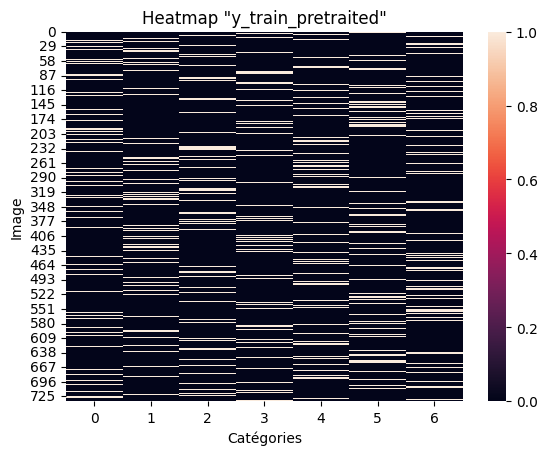

In [28]:
affiche_heatmap(y_train_pretraited, "y_train_pretraited")

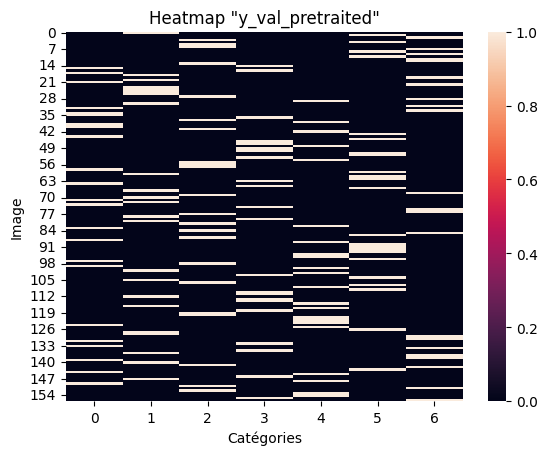

In [29]:
affiche_heatmap(y_val_pretraited, "y_val_pretraited")

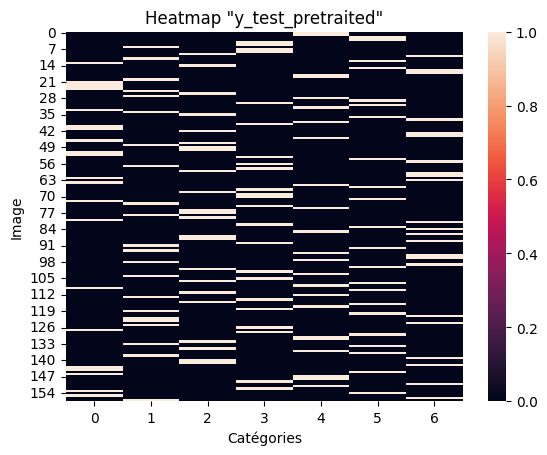

In [30]:
affiche_heatmap(y_test_pretraited, "y_test_pretraited")

### <span style='background:black'>b/ features</span>

Le prétraitement des features pour le **MLP** se déroule en plusieurs étapes :
- Redimensionnement de l'images en 224 x 224 pixels
- Convertion de l'image en tableau NumPy
- Certification des dimensions (hauteur, largeur, couleur)

In [31]:
# Prétraitement jeu entrainement
X_train_pretraited = pretraitement_image(X_train, 'mlp')

# Prétraitement jeu validation
X_val_pretraited = pretraitement_image(X_val, 'mlp')

# Prétraitement jeu test
X_test_pretraited = pretraitement_image(X_test, 'mlp')

Nous vérifions les dimensions des images pour vérifier que le prétraitement des features a bien été réalisé.

In [32]:
print("X_train_pretraited : ", X_train_pretraited.shape)
print("X_val_pretraited : ", X_val_pretraited.shape)
print("X_test_pretraited : ", X_test_pretraited.shape)

X_train_pretraited :  (735, 224, 224, 3)
X_val_pretraited :  (157, 224, 224, 3)
X_test_pretraited :  (158, 224, 224, 3)


## <span style='background:green'>2/ Elaboration du modèle</span>

### <span style='background:black'>a/ Architecture</span>

Le modèle MLP présente la structure suivante :
- 1 couche d'entrée de forme (224, 224, 3)
- 1 couche Flatten pour aplatir les données d'entrée
- 2 couches Dense avec 10 neurones chacune et 1 fonction d'activation ReLU
- 1 couche Dense avec 7 neurones et une fonction d'activation sigmoid

### <span style='background:black'>b/ Compilation et métrique d'évaluation</span>

Le modèle est compilé avec :
- la fonction de perte '**categorical_crossentropy**' qui est adaptée à la classification multiclasse où les étiquettes sont codées en OneHotEncoder.

- l'optimiseur '**rmsprop**' qui est un algoritme d'optimisation intéressant pour les réseaux de neurones profonds.

- la métrique d'évaluation '**accuracy**' qui est une métrique très utilisée pour les problèmes de classification. Elle mesure le pourcentage de prédictions correctes du modèle. Sa principale limite est de présenter une image  trompeuse de la perfomance du modèle si les classes sont déséquilibrées, ce qui n'est pas le cas ici puisque nos 7 classes sont parfaitement équilibrées (150 images par classe).

In [33]:
fonction_perte = 'categorical_crossentropy'
optimiseur = 'rmsprop'
metric_eval = 'accuracy'


### <span style='background:black'>c/ Callbacks</span>

Les callbacks sont des fonctions qui sont appelées à des moments précis de
l'entrainement du modèle pour effectuer des actions spécifiques.

Nous créons 2 callbacks :
- **ModelCheckpoint** pour sauvegarder le meilleur modèle pendant l'entrainement. Cela permet de conserver les poids du modèle qui a présenté les meilleures performances (perte du jeu de validation la plus petite) même si le modèle commence à se détériorer ou à surapprendre par la suite.

- **EarlyStopping** pour arrêter l'entrainement si val_loss (la perte du jeu de validation) ne diminue plus après 3 epochs. Cela permet de gagner du temps d'entrainement et d'éviter de surapprendre le modèle pour avoir une meilleure généralisation.

In [34]:
# Nombre d'epochs pour la patience
patience = 3

### <span style='background:black'>d/ Indicateur supplémentaire</span>

Pour comparer les performances des différents modèles, nous utilisons un indicateur supplémentaire pour améliorer notre prise de décision en mesurant le **temps de calcul nécessaire pour l'entrainement du modèle.** En effet, l'accuracy seule ne suffit pas à déterminer le meilleur modèle, il faut également que celui-ci réalise ses calculs en un minimun de temps.

=> Le choix de l'indicateur est donc un compromis entre l'accuracy et le temps de calcul.

### <span style='background:black'>e/ Optimisation hyperparamètre</span>

Nous déterminons le meilleur modèle en ajustant l'hyperparamètre **batch_size** (nombre d'images utilisées pour chaque mise à jour du modèle) mais on fixant le nombre d'epochs :
- epochs = 15
- batch_size = 32, 64, 128, 256 et 512

In [35]:
# Définir les batch_sizes à tester
batch_sizes = [32, 64, 128, 256, 512]

# SI fichier des resultats existe ALORS on passe
if is_modele_mlp_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:

    # Créer des dictionnaires vides pour stocker l'historique, temps, epochs
    history_dict, time_dict, epoch_dict = {}, {}, {}

    # POUR chaque batch_size
    for batch_size in batch_sizes:
        print("\n", "=" * 30, "batch_size :", batch_size, "=" * 30)

        # Créer un modèle MLP
        model_mlp = creation_modele_mlp(
            fonction_perte,
            optimiseur,
            metric_eval,
            )

        # Création des callbacks
        callbacks_list, chemin_modele_export = creer_callbacks(
            "model_mlp",
            patience,
            batch_size
            )

        # Enregistrer le temps de début
        start_time = time.time()

        # Entraîner le modèle
        history_mlp = model_mlp.fit(
            X_train_pretraited,
            y_train_pretraited,
            epochs=15,
            batch_size=batch_size,
            callbacks=callbacks_list,
            validation_data=(X_val_pretraited, y_val_pretraited),
            verbose=0
            )

        # Enregistrer le temps de fin
        end_time = time.time()

        # Calculer le temps d'entraînement
        training_time = end_time - start_time
        print(f"\n=> Temps d'entraînement : {round(training_time, 2)} sec <=")

        # Calculer le nombre d'epochs
        epochs = len(history_mlp.history['loss'])

        # Stocker l'historique, le temps d'entraînement et le nombre d'epochs
        history_dict[batch_size] = history_mlp.history
        time_dict[batch_size] = training_time
        epoch_dict[batch_size] = epochs


 ============================== batch_size : 32 ==============================

Epoch 1: val_loss improved from inf to 1.94605, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 2: val_loss improved from 1.94605 to 1.94604, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 3: val_loss improved from 1.94604 to 1.94603, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 4: val_loss improved from 1.94603 to 1.94602, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 5: val_loss improved from 1.94602 to 1.94600, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 6: val_loss improved from 1.94600 to 1.94599, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 7: val_loss improved from 1.94599 to 1.94598, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epoch 8: val_loss improved from 1.94598 to 1.94597, saving model to ./modele_ML/model_mlp_batch32_best_weights.h5

Epo

Comparons les résultats obtenus pour les différents batch_size :

In [36]:
# SI fichier des resultats existe ALORS on passe
if is_modele_mlp_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:

    # Créer un DataFrame à partir de l'historique
    resultat_mlp = pd.DataFrame(
        {k: v['val_accuracy'][-1] for k, v in history_dict.items()},
        index=[0]
        )

    # Transposer le DataFrame (batch_sizes en index)
    resultat_mlp = resultat_mlp.transpose()

    # Renommer la colonne
    resultat_mlp.columns = ['Validation Accuracy']

    # Ajouter les temps d'entraînement et nombre d'epoch au DataFrame
    resultat_mlp['Temps (sec)'] = pd.Series(time_dict)
    resultat_mlp['Epochs'] = pd.Series(epoch_dict)

    # Sauvegarder le DataFrame dans un fichier CSV
    resultat_mlp.to_csv('resultat_mlp.csv', index=False)

# Afficher le batch_size avec la meilleure accuracy de validation
batch_meilleur_mlp = resultat_mlp['Validation Accuracy'].idxmax()
print(f"\nMeilleur batch_size (accuracy): {batch_meilleur_mlp}")

# Surligner les meilleures valeurs
resultat_mlp.style.apply(surligne_meilleur)


Meilleur batch_size (accuracy): 128


,Validation Accuracy,Temps (sec),Epochs
32,0.140127,12.944698,15
64,0.140127,11.113686,15
128,0.146497,9.063315,11
256,0.140127,9.667602,15
512,0.140127,8.974178,11


Les meilleurs performances sont obtenues pour un batch_size de 128 (accuracy de validation la plus grande et temps de calcul le plus faible).

Nous choississons donc le batch_size de 128 pour la suite des analyses avec le **MLP**.

## <span style='background:green'>3/ Modèle optimal</span>

### <span style='background:black'>a/Création et entrainement</span>

Nous entrainons à nouveau le modèle avec le bon batch_size pour obtenir le modèle optimal.

In [37]:
# SI fichier des resultats existe ALORS on passe
if is_modele_mlp_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON on realise les calculs
else:
    print("On fait les calculs.")

    # Créer le modèle optimal MLP
    model_optimal_mlp = creation_modele_mlp(
        fonction_perte,
        optimiseur,
        metric_eval,
    )

    # Création des callbacks
    callbacks_list, chemin_modele_export = creer_callbacks(
        "model_optimal_mlp",
        patience,
    )

    # Entraîner le modèle avec batch__meilleur_mlp
    history_optimal_mlp = model_optimal_mlp.fit(
        X_train_pretraited,
        y_train_pretraited,
        epochs=15,
        batch_size=batch_meilleur_mlp,
        callbacks=callbacks_list,
        validation_data=(X_val_pretraited, y_val_pretraited),
        verbose=0
    )

    # Sauvegarder l'objet history
    with open("history_optimal_mlp.pickle", 'wb') as f:
        pickle.dump(history_optimal_mlp.history, f)

On fait les calculs.

Epoch 1: val_loss improved from inf to 1.94597, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 2: val_loss improved from 1.94597 to 1.94597, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 3: val_loss improved from 1.94597 to 1.94596, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 4: val_loss improved from 1.94596 to 1.94596, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 5: val_loss improved from 1.94596 to 1.94595, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 6: val_loss improved from 1.94595 to 1.94595, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 7: val_loss improved from 1.94595 to 1.94595, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 8: val_loss improved from 1.94595 to 1.94594, saving model to ./modele_ML/model_optimal_mlp_best_weights.h5

Epoch 9: val_loss improved from 1.94594 to 1.94594, saving mod

### <span style='background:black'>b/ Plot loss et accuracy</span>

Nous affichons l'évolution de la perte et de l'accuracy pour le jeu d'entrainement et le jeu de validation au cours des epoch.

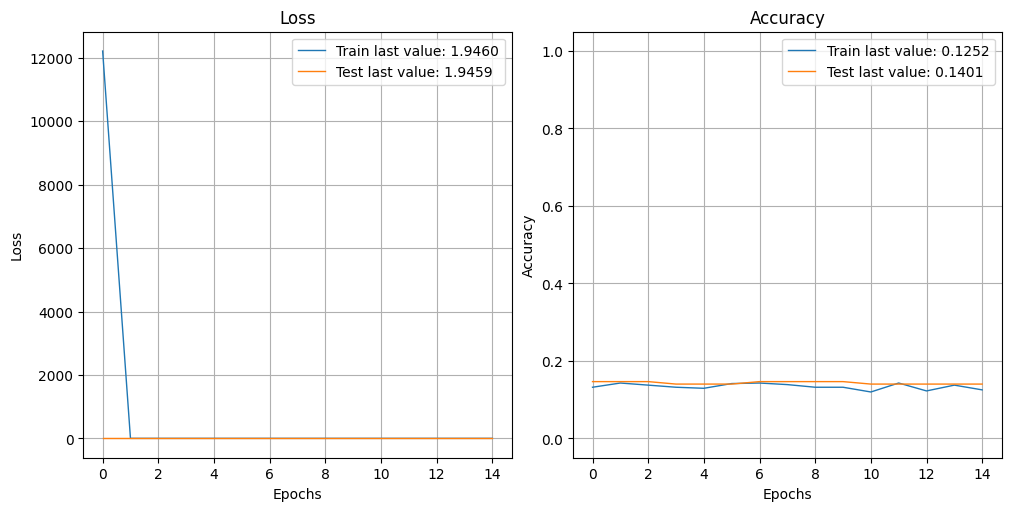

In [38]:
# Afficher l'historique de l'entraînement
show_history(history_optimal_mlp)

# Definir le chemin d'export de la figure
dossier_figure = "./figure/"
nom_figure = "history_optimal_mlp.png"
chemin_figure_export = os.path.join(dossier_figure, nom_figure)

# Sauvegarder le plot de l'historique de l'entraînement
plot_history(history_optimal_mlp, path=chemin_figure_export)
plt.close()

Nous remarquons que le modèle présente une perte de validation faible (0,14), ce qui est un bon indicateur de la qualité du modèle. En revanche, nous remarquons que l'accuracy de validation est très faible (< 0,2).

Ce modèle présente présente un **surapprentissage** important puisqu'il a appris "par coeur" les données d'entrainement mais il n'est pas capable de généraliser sur les données de validation.

### <span style='background:black'>c/ Comparatif des accuracy</span>

Nous comparons les accuracy du modèle optimal (MLP) avec les poids du meilleur modèle pour les 3 jeux de données (entrainement, validation et test).

In [39]:
# Charger les poids du meilleur modèle
model_optimal_mlp.load_weights("./modele_ML/model_optimal_mlp_best_weights.h5")

# Evaluation meilleur modèle sur les données d'entraînement
loss_mlp_train, accuracy_mlp_train = model_optimal_mlp.evaluate(
    X_train_pretraited,
    y_train_pretraited
)
print("Training Accuracy   :  {:.3f}".format(accuracy_mlp_train))

# Evaluation meilleur modèle sur les données de validation
loss_mlp_val, accuracy_mlp_val = model_optimal_mlp.evaluate(
    X_val_pretraited,
    y_val_pretraited
)
print("Validation Accuracy :  {:.3f}".format(accuracy_mlp_val))

# Evaluation meilleur modèle sur les données de test
loss_mlp_test, accuracy_mlp_test = model_optimal_mlp.evaluate(
    X_test_pretraited,
    y_test_pretraited
)
print("Test Accuracy       :  {:.3f}".format(accuracy_mlp_test))

23/23 [==============================] - 0s 10ms/step - loss: 1.9459 - accuracy: 0.1429
Training Accuracy   :  0.143
5/5 [==============================] - 0s 15ms/step - loss: 1.9459 - accuracy: 0.1401
Validation Accuracy :  0.140
5/5 [==============================] - 0s 11ms/step - loss: 1.9459 - accuracy: 0.1456
Test Accuracy       :  0.146


Les 3 accuracy sont proches mais faibles (< 0,15).

### <span style='background:black'>d/ Matrice de confusion</span>

Nous affichons les valeurs réelles et celles prédites par le modèle optimal pour les données de validation.

In [40]:
# Categorie réelle et prédites des images de validation
y_val_num = np.argmax(y_val_pretraited, axis=1)
y_val_pred = np.argmax(model_optimal_mlp.predict(X_val_pretraited), axis=1)

# Afficher les 30 premières catégories réelles et prédites
print("Categorie reelle : ", y_val_num[:30], "\n")
print("Categorie prédite : ", y_val_pred[:30])

5/5 [==============================] - 0s 14ms/step
Categorie reelle :  [1 5 6 2 5 2 2 6 5 6 5 6 6 2 3 0 3 0 1 6 1 0 6 1 1 1 1 2 6 4] 

Categorie prédite :  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


Il semblerait que le modèle optimal MLP n'a fait que prédire une seule catégorie pour toutes les images de validation.

In [41]:
# Créer un DataFrame à partir de y_val_pred
y_val_pred_df = pd.DataFrame(y_val_pred, columns=['categorie_predite'])

# Obtenir le nombre de chaque valeur unique
unique_counts = y_val_pred_df['categorie_predite'].value_counts()

# Obtenir le pourcentage de chaque valeur unique
unique_percentages = y_val_pred_df['categorie_predite'].value_counts(
    normalize=True) * 100

# Créer un DataFrame pour afficher les résultats
result = pd.DataFrame({
    'Nombre': unique_counts,
    'Pourcentage': unique_percentages
})

# Afficher les résultats
display(result)
print(f"La seul categorie predite est : {categories[unique_counts.index[0]]}")

,Nombre,Pourcentage
4,157,100.0


La seul categorie predite est : Kitchen & Dining 


Nous confirmons les résultats en affichant la matrice de confusion et le rapport de classification.


Correspondance des clusters :  [0 0 0 0 0 0 0]


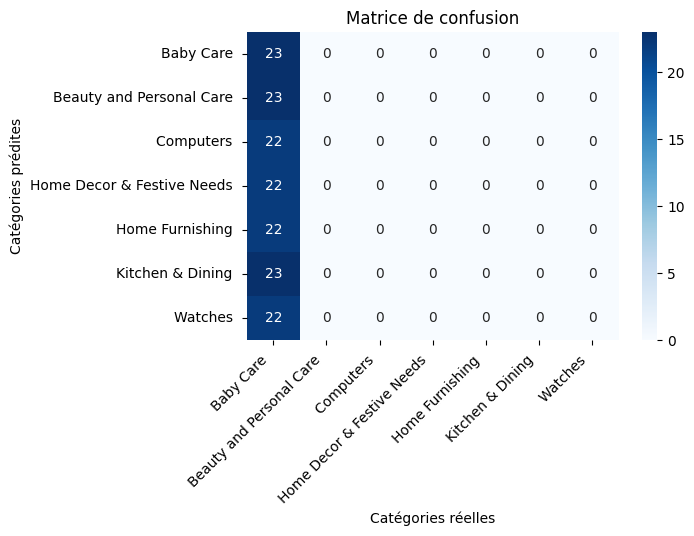

              precision    recall  f1-score   support

           0       0.15      1.00      0.26        23
           1       1.00      0.00      0.00        23
           2       1.00      0.00      0.00        22
           3       1.00      0.00      0.00        22
           4       1.00      0.00      0.00        22
           5       1.00      0.00      0.00        23
           6       1.00      0.00      0.00        22

    accuracy                           0.15       157
   macro avg       0.88      0.14      0.04       157
weighted avg       0.87      0.15      0.04       157



In [42]:
# Verifier la correspondance des clusters
y_val_pred_transform = conf_mat_transform_argmax(y_val_num, y_val_pred)

# Afficher la matrice de confusion et le rapport de classification
conf_mat_mlp = matrice_conf_et_rapport(
    y_val_num,
    y_val_pred_transform,
    categories
    )

Le modèle optimal MLP presente un f-score < 0,16.

<div class="alert alert-block alert-success"><b>Bilan: </b> <br>
Le modèle optimal MLP présente des performances très faibles qui sont équivalentes à un classifieur naïf en ne prédisant qu'une seule catégorie. </div>

# <span style='background:blue'>Etape 5 : CNN</span>

Pour cette classification d'image automatique, nous allons utiliser un Convolutionnal Neural Network (**CNN**).

## <span style='background:green'>1/ Prétraitement des données</span>

### <span style='background:black'>a/ target</span>

Nous utilisons le même prétraitement de la target que précedemment. Pour rappel, il consiste à transformer les catégories avec un **OneHotEncoder** pour pouvoir les utiliser dans le modèle de machine learning.

### <span style='background:black'>b/ features</span>

Nous utilisons le même prétraitement des features que précedemment. Pour rappel, il se déroule en plusieurs étapes :
- Redimensionnement de l'images en 224 x 224 pixels
- Convertion de l'image en tableau NumPy
- Certification des dimensions (hauteur, largeur, couleur)

## <span style='background:green'>2/ Elaboration du modèle</span>

### <span style='background:black'>a/ Architecture</span>

Le modèle CNN présente la structure suivante :
- 1 couche de convolution avec 64 filtres de taille 3 x 3 et une fonction d'activation ReLU
- 1 couche de pooling avec un filtre de taille 2 x 2
- 1 couche de flatten pour applatir les sorties des couches précédentes en un vecteur
- 1 couche dense avec 112 neurones et une fonction d'activation ReLU
- 1 couche de sortie avec 7 neurones et une fonction d'activation softmax

### <span style='background:black'>b/ Compilation et métrique d'évaluation</span>

Le modèle est compilé avec les mêmes paramètres que précedemment, à savoir :
- la fonction de perte '**categorical_crossentropy**'

- l'optimiseur '**rmsprop**'

- la métrique d'évaluation '**accuracy**'

### <span style='background:black'>c/ Callbacks</span>

Nous utilisons les mêmes callbacks que précedemment, à savoir :

- **ModelCheckpoint** pour sauvegarder le meilleur modèle pendant l'entrainement.

- **EarlyStopping** pour arrêter l'entrainement si val_loss (la perte du jeu de validation) ne diminue plus après 3 epochs.

### <span style='background:black'>d/ Indicateur supplémentaire</span>

Nous utilisons le même indicateur supplémentaire que précedemment, à savoir le **temps de calcul**.

### <span style='background:black'>e/ Optimisation hyperparamètre</span>

Nous utilisont les mêmes paramètres que précedemment, à savoir :
- epochs = 15
- batch_size = 32, 64, 128, 256 et 512

In [43]:
# SI fichier des resultats existe ALORS on passe
if is_modele_cnn_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:
    # Créer des dictionnaires vides pour stocker l'historique, temps, epochs
    history_dict, time_dict, epoch_dict = {}, {}, {}

    # POUR chaque batch_size
    for batch_size in batch_sizes:
        print("\n", "=" * 30, "batch_size :", batch_size, "=" * 30)

        # Créer un modèle CNN
        model_cnn = creation_modele_cnn(
            fonction_perte,
            optimiseur,
            metric_eval,
            )

        # Création des callbacks
        callbacks_list, chemin_modele_export = creer_callbacks(
            "model_cnn",
            patience,
            batch_size
            )

        # Enregistrer le temps de début
        start_time = time.time()

        # Entraîner le modèle
        history_cnn = model_cnn.fit(
            X_train_pretraited,
            y_train_pretraited,
            epochs=15,
            batch_size=batch_size,
            callbacks=callbacks_list,
            validation_data=(X_val_pretraited, y_val_pretraited),
            verbose=1
            )

        # Enregistrer le temps de fin
        end_time = time.time()

        # Calculer le temps d'entraînement
        training_time = end_time - start_time
        print(f"\n=> Temps d'entraînement : {round(training_time, 2)} sec <=")

        # Calculer le nombre d'epochs
        epochs = len(history_cnn.history['loss'])

        # Stocker l'historique, le temps d'entraînement et le nombre d'epochs
        history_dict[batch_size] = history_cnn.history
        time_dict[batch_size] = training_time
        epoch_dict[batch_size] = epochs


 ============================== batch_size : 32 ==============================
Epoch 1/15
23/23 [==============================] - ETA: 0s - loss: 14822.1494 - accuracy: 0.1415
Epoch 1: val_loss improved from inf to 806.74597, saving model to ./modele_ML/model_cnn_batch32_best_weights.h5
23/23 [==============================] - 14s 609ms/step - loss: 14822.1494 - accuracy: 0.1415 - val_loss: 806.7460 - val_accuracy: 0.2038
Epoch 2/15
23/23 [==============================] - ETA: 0s - loss: 432.1506 - accuracy: 0.3769
Epoch 2: val_loss improved from 806.74597 to 176.76892, saving model to ./modele_ML/model_cnn_batch32_best_weights.h5
23/23 [==============================] - 11s 506ms/step - loss: 432.1506 - accuracy: 0.3769 - val_loss: 176.7689 - val_accuracy: 0.3567
Epoch 3/15
23/23 [==============================] - ETA: 0s - loss: 35.1079 - accuracy: 0.6980
Epoch 3: val_loss improved from 176.76892 to 80.19987, saving model to ./modele_ML/model_cnn_batch32_best_weights.h5
23/23 [===

Comparons les résultats obtenus pour les différents batch_size :

In [44]:
# SI fichier des resultats existe ALORS on passe
if is_modele_cnn_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:
    # Créer un DataFrame à partir de l'historique
    resultat_cnn = pd.DataFrame(
        {k: v['val_accuracy'][-1] for k, v in history_dict.items()},
        index=[0]
        )

    # Transposer le DataFrame (batch_sizes en index)
    resultat_cnn = resultat_cnn.transpose()

    # Renommer la colonne
    resultat_cnn.columns = ['Validation Accuracy']

    # Ajouter les temps d'entraînement et nombre d'epoch au DataFrame
    resultat_cnn['Temps (sec)'] = pd.Series(time_dict)
    resultat_cnn['Epochs'] = pd.Series(epoch_dict)

    # Sauvegarder le DataFrame dans un fichier CSV
    resultat_cnn.to_csv('resultat_cnn.csv', index=False)

# Afficher le batch_size avec la meilleure accuracy de validation
batch_meilleur_cnn = resultat_cnn['Validation Accuracy'].idxmax()
print(f"\nMeilleur batch_size (accuracy): {batch_meilleur_cnn}")

# Surligner les meilleures valeurs
resultat_cnn.style.apply(surligne_meilleur)


Meilleur batch_size (accuracy): 256


,Validation Accuracy,Temps (sec),Epochs
32,0.375796,93.163556,9
64,0.382166,141.393440,15
128,0.165605,151.689290,15
256,0.439490,147.746990,15
512,0.407643,167.492842,15


### <span style='background:red'>bilan a faire</span>

## <span style='background:green'>3/ Modèle optimal</span>

### <span style='background:black'>a/Création et entrainement</span>

Nous entrainons à nouveau le modèle avec le bon batch_size pour obtenir le modèle optimal.

In [45]:
# SI fichier des resultats existe ALORS on passe
if is_modele_cnn_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON on realise les calculs
else:
    print("On fait les calculs.")

    # # Utiliser le GPU
    # with tf.device('/gpu:0'):

    # Créer le modèle optimal CNN
    model_optimal_cnn = creation_modele_cnn(
        fonction_perte,
        optimiseur,
        metric_eval,
    )

    # Création des callbacks
    callbacks_list, chemin_modele_export = creer_callbacks(
        "model_optimal_cnn",
        patience,
    )

    # Entraîner le modèle avec batch_meilleur_cnn
    history_optimal_cnn = model_optimal_cnn.fit(
        X_train_pretraited,
        y_train_pretraited,
        epochs=15,
        batch_size=batch_meilleur_cnn,
        callbacks=callbacks_list,
        validation_data=(X_val_pretraited, y_val_pretraited),
        verbose=1
    )

    # Sauvegarder l'objet history
    with open("history_optimal_cnn.pickle", 'wb') as f:
        pickle.dump(history_optimal_cnn.history, f)

On fait les calculs.
Epoch 1/15
3/3 [==============================] - ETA: 0s - loss: 44755.4453 - accuracy: 0.1592
Epoch 1: val_loss improved from inf to 33247.62891, saving model to ./modele_ML/model_optimal_cnn_best_weights.h5
3/3 [==============================] - 12s 5s/step - loss: 44755.4453 - accuracy: 0.1592 - val_loss: 33247.6289 - val_accuracy: 0.1783
Epoch 2/15
3/3 [==============================] - ETA: 0s - loss: 27983.9160 - accuracy: 0.1537
Epoch 2: val_loss improved from 33247.62891 to 9751.32715, saving model to ./modele_ML/model_optimal_cnn_best_weights.h5
3/3 [==============================] - 11s 5s/step - loss: 27983.9160 - accuracy: 0.1537 - val_loss: 9751.3271 - val_accuracy: 0.1401
Epoch 3/15
3/3 [==============================] - ETA: 0s - loss: 9309.7900 - accuracy: 0.1483
Epoch 3: val_loss improved from 9751.32715 to 5371.68750, saving model to ./modele_ML/model_optimal_cnn_best_weights.h5
3/3 [==============================] - 10s 4s/step - loss: 9309.7900

### <span style='background:black'>b/ Plot loss et accuracy</span>

Nous affichons l'évolution de la perte et de l'accuracy pour le jeu d'entrainement et le jeu de validation au cours des epoch.

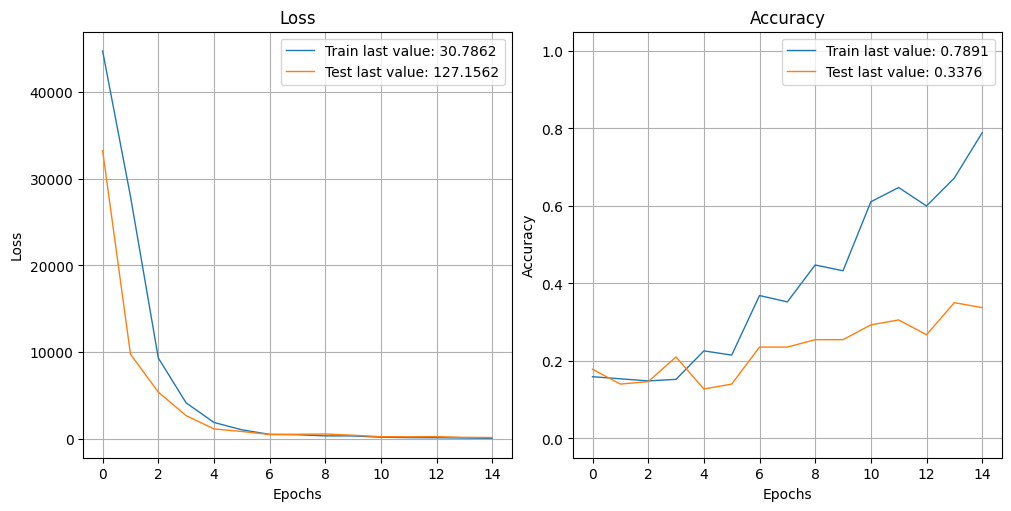

In [46]:
# Afficher l'historique de l'entraînement
show_history(history_optimal_cnn)

# Definir le chemin d'export de la figure
dossier_figure = "./figure/"
nom_figure = f"history_optimal_cnn_batch{batch_meilleur_cnn}.png"
chemin_figure_export = os.path.join(dossier_figure, nom_figure)

# Sauvegarder l'historique de l'entraînement
plot_history(history_optimal_cnn, path=chemin_figure_export)
plt.close()

### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>c/ Comparatif des accuracy</span>

Nous comparons les accuracy du modèle optimal (CNN) avec les poids du meilleur modèle pour les 3 jeux de données (entrainement, validation et test).

In [47]:
# Charger les poids du meilleur modèle
model_optimal_cnn.load_weights("./modele_ML/model_optimal_cnn_best_weights.h5")

# Evaluation meilleur modèle sur les données d'entraînement
loss_cnn_train, accuracy_cnn_train = model_optimal_cnn.evaluate(
    X_train_pretraited,
    y_train_pretraited
)
print("Training Accuracy   :  {:.3f}".format(accuracy_cnn_train))

# Evaluation meilleur modèle sur les données de validation
loss_cnn_val, accuracy_cnn_val = model_optimal_cnn.evaluate(
    X_val_pretraited,
    y_val_pretraited
)
print("Validation Accuracy :  {:.3f}".format(accuracy_cnn_val))

# Evaluation meilleur modèle sur les données de test
loss_cnn_test, accuracy_cnn_test = model_optimal_cnn.evaluate(
    X_test_pretraited,
    y_test_pretraited
)
print("Test Accuracy       :  {:.3f}".format(accuracy_cnn_test))

23/23 [==============================] - 1s 46ms/step - loss: 22.3777 - accuracy: 0.7986
Training Accuracy   :  0.799
5/5 [==============================] - 0s 47ms/step - loss: 127.1562 - accuracy: 0.3376
Validation Accuracy :  0.338
5/5 [==============================] - 0s 48ms/step - loss: 132.1139 - accuracy: 0.3481
Test Accuracy       :  0.348


### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>d/ Matrice de confusion</span>

Nous affichons les valeurs réelles et celles prédites par le modèle optimal pour les données de validation.

In [48]:
# Categories prédites des images de validation
y_val_pred = np.argmax(model_optimal_cnn.predict(X_val_pretraited), axis=1)

# Afficher les 30 premières catégories réelles et prédites
print("Categorie reelle : ", y_val_num[:30], "\n")
print("Categorie prédite : ", y_val_pred[:30])

5/5 [==============================] - 0s 57ms/step
Categorie reelle :  [1 5 6 2 5 2 2 6 5 6 5 6 6 2 3 0 3 0 1 6 1 0 6 1 1 1 1 2 6 4] 

Categorie prédite :  [0 0 0 1 0 2 3 0 0 2 0 0 2 2 0 0 0 0 0 1 3 0 1 0 0 1 0 0 0 0]


Nous confirmons les résultats en affichant la matrice de confusion et le rapport de classification.


Correspondance des clusters :  [0 6 2 3 4 5 6]


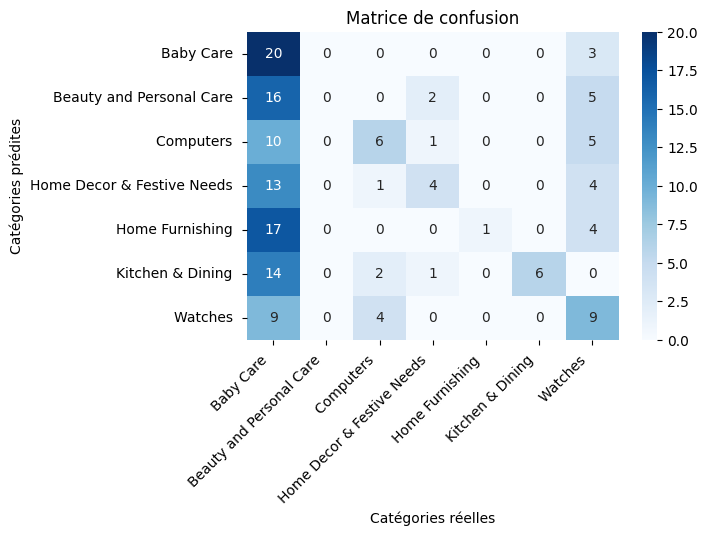

              precision    recall  f1-score   support

           0       0.20      0.87      0.33        23
           1       1.00      0.00      0.00        23
           2       0.46      0.27      0.34        22
           3       0.50      0.18      0.27        22
           4       1.00      0.05      0.09        22
           5       1.00      0.26      0.41        23
           6       0.30      0.41      0.35        22

    accuracy                           0.29       157
   macro avg       0.64      0.29      0.25       157
weighted avg       0.64      0.29      0.25       157



In [49]:
# Verifier la correspondance des clusters
y_val_pred_transform = conf_mat_transform_argmax(y_val_num, y_val_pred)

# Afficher la matrice de confusion et le rapport de classification
conf_mat_cnn = matrice_conf_et_rapport(
    y_val_num,
    y_val_pred_transform,
    categories
    )

### <span style='background:red'>bilan a faire</span>

<div class="alert alert-block alert-success"><b>Bilan: </b> <br>
Le modèle optimal CNN présente des performances ... </div>

# <span style='background:blue'>Etape 6 : CNN + Transfer learning VGG-16</span>

Pour cette classification d'image automatique, nous allons utiliser un **réseau de neurones convolutionnels** (*Convolutional Neural Network*, **CNN**). Nous le couplons avec la technique du **transfer learning** pour utiliser le modèle pré-entrainé **VGG-16**.

Le modèle VGG-16 a été entrainé sur un jeu de données ImageNet de plus d'1 million d'images.

## <span style='background:green'>1/ Prétraitement des données</span>

### <span style='background:black'>a/ target</span>

Nous utilisons le même prétraitement de la target que précedemment. Pour rappel, il consiste à transformer les catégories avec un **OneHotEncoder** pour pouvoir les utiliser dans le modèle de machine learning.

### <span style='background:black'>b/ features</span>

Le prétraitement des features pour le **VGG16** se déroule en plusieurs étapes :
- Redimensionnement de l'images en 224 x 224 pixels
- Convertion de l'image en tableau NumPy
- Certification des dimensions (hauteur, largeur, couleur)
- Normaliser les pixels de l'image pour VGG16 :
  - Mettre à l'echelle entre -1 et 1 (soustraire valeur moyenne des
    des pixels sur le canaux RGB du jeu de données ImageNet)
  - inverser les canaux RGB en BGR

In [50]:
# Prétraitement jeu entrainement
X_train_pretraited = pretraitement_image(X_train, 'vgg16')

# Prétraitement jeu validation
X_val_pretraited = pretraitement_image(X_val, 'vgg16')

# Prétraitement jeu test
X_test_pretraited = pretraitement_image(X_test, 'vgg16')

Nous vérifions les dimensions des images pour vérifier que le prétraitement des features a bien été réalisé.

In [51]:
print("X_train_pretraited : ", X_train_pretraited.shape)
print("X_val_pretraited : ", X_val_pretraited.shape)
print("X_test_pretraited : ", X_test_pretraited.shape)

X_train_pretraited :  (735, 224, 224, 3)
X_val_pretraited :  (157, 224, 224, 3)
X_test_pretraited :  (158, 224, 224, 3)


## <span style='background:green'>2/ Elaboration du modèle</span>

### <span style='background:black'>a/ Architecture</span>

Le modèle VGG16 est composé de 16 couches de convolution et de 3 couches fully connected. Il classe les images (224 x 224 pixels) en 1000 catégories différentes.

Nous créons un modèle de classification d'images CNN en réalisant un **transfer learning** à partir du modèle VGG16. Ce dernier est importé **sans** les 3 couches fully connected. Les **poids** du modèle sont initialisés
avec les poids du modèle entrainé sur ImageNet.

Le modèle de transfer learning VGG16 est utilisé comme extracteur de caractéristiques, et 4 nouvelles couches sont ajoutées à sa sortie :
- 1 couche de **GlobalAveragePooling2D** pour convertir les features en un vecteur 1D
- 1 couche **Dense** de 256 neurones et une fonction d'activation **relu**
- 1 couche **Dropout** pour désactiver 50% des neurones
- 1 couche **Dense** de 7 neurones et une fonction d'activation **softmax** pour la classification

### <span style='background:black'>b/ Compilation et métrique d'évaluation</span>

Le modèle est compilé avec les mêmes paramètres que précedemment, à savoir :
- la fonction de perte '**categorical_crossentropy**'

- l'optimiseur '**rmsprop**'

- la métrique d'évaluation '**accuracy**'

### <span style='background:black'>c/ Callbacks</span>

Nous utilisons les mêmes callbacks que précedemment, à savoir :

- **ModelCheckpoint** pour sauvegarder le meilleur modèle pendant l'entrainement.

- **EarlyStopping** pour arrêter l'entrainement si val_loss (la perte du jeu de validation) ne diminue plus après 3 epochs.

### <span style='background:black'>d/ Indicateur supplémentaire</span>

Nous utilisons le même indicateur supplémentaire que précedemment, à savoir le **temps de calcul**.

### <span style='background:black'>e/ Optimisation hyperparamètre</span>

Nous utilisont les mêmes paramètres que précedemment, à savoir :
- epochs = 15
- batch_size = 32, 64, 128, 256 et 512

In [52]:
# SI fichier des resultats existe ALORS on passe
if is_modele_tf_vgg16_noDA_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:

    # Créer des dictionnaires vides pour stocker l'historique, temps, epochs
    history_dict, time_dict, epoch_dict = {}, {}, {}

    # POUR chaque batch_size
    for batch_size in batch_sizes:
        print("\n", "=" * 30, "batch_size :", batch_size, "=" * 30)

        # # Utiliser le GPU
        # with tf.device('/gpu:0'):

        # Créer un modèle CNN
        model_tf_vgg16_noDA = creation_modele_transfer_vgg16(
            fonction_perte,
            optimiseur,
            metric_eval,
            verbose=1
        )

        # Création des callbacks
        callbacks_list, chemin_modele_export = creer_callbacks(
            "model_tf_vgg16_noDA",
            patience,
            batch_size
            )

        # Enregistrer le temps de début
        start_time = time.time()

        # Entraîner le modèle
        history_tf_vgg16_noDA = model_tf_vgg16_noDA.fit(
            X_train_pretraited,
            y_train_pretraited,
            epochs=15,
            batch_size=batch_size,
            callbacks=callbacks_list,
            validation_data=(X_val_pretraited, y_val_pretraited),
            verbose=1
            )

        # Enregistrer le temps de fin
        end_time = time.time()

        # Calculer le temps d'entraînement
        training_time = end_time - start_time
        print(f"\n=> Temps d'entraînement : {round(training_time, 2)} sec <=")

        # Calculer le nombre d'epochs
        epochs = len(history_tf_vgg16_noDA.history['loss'])

        # Stocker l'historique, le temps d'entraînement et le nombre d'epochs
        history_dict[batch_size] = history_tf_vgg16_noDA.history
        time_dict[batch_size] = training_time
        epoch_dict[batch_size] = epochs


 ============================== batch_size : 32 ==============================
58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 788544)            0         
                                                                 
 dense_26 (Dense)            (None, 112)               88317040  
                                                                 
 dense_27 (Dense)            (None, 7)                 791       
                                        

Comparons les résultats obtenus pour les différents batch_size :

In [53]:
# SI fichier des resultats existe ALORS on passe
if is_modele_tf_vgg16_noDA_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON il n'existe pas et il faut faire les calculs
else:
    # Créer un DataFrame à partir de l'historique
    resultat_tf_vgg16_noDA = pd.DataFrame(
        {k: v['val_accuracy'][-1] for k, v in history_dict.items()},
        index=[0]
        )

    # Transposer le DataFrame (batch_sizes en index)
    resultat_tf_vgg16_noDA = resultat_tf_vgg16_noDA.transpose()

    # Renommer la colonne
    resultat_tf_vgg16_noDA.columns = ['Validation Accuracy']

    # Ajouter les temps d'entraînement et nombre d'epoch au DataFrame
    resultat_tf_vgg16_noDA['Temps (sec)'] = pd.Series(time_dict)
    resultat_tf_vgg16_noDA['Epochs'] = pd.Series(epoch_dict)

    # Sauvegarder le DataFrame dans un fichier CSV
    resultat_tf_vgg16_noDA.to_csv('resultat_tf_vgg16_noDA.csv', index=False)

# Afficher le batch_size avec la meilleure accuracy de validation
batch_meilleur_tf_vgg16_noDA = resultat_tf_vgg16_noDA[
    'Validation Accuracy'].idxmax()
print(f"\nMeilleur batch_size (accuracy): {batch_meilleur_tf_vgg16_noDA}")

# Surligner les meilleures valeurs
resultat_tf_vgg16_noDA.style.apply(surligne_meilleur)


Meilleur batch_size (accuracy): 512


,Validation Accuracy,Temps (sec),Epochs
32,0.808917,73.202044,7
64,0.789809,113.751888,12
128,0.802548,103.090134,11
256,0.802548,137.547353,15
512,0.815287,136.498631,15


### <span style='background:red'>bilan a faire</span>

## <span style='background:green'>3/ Modèle optimal</span>

### <span style='background:black'>a/Création et entrainement</span>

Nous entrainons à nouveau le modèle avec le bon batch_size pour obtenir le modèle optimal.

In [54]:
# SI fichier des resultats existe ALORS on passe
if is_modele_tf_vgg16_noDA_calculed:
    print("Les calculs ont deja tournés sur Google Colab")

# SINON on realise les calculs
else:
    print("On fait les calculs.")

    # # Utiliser le GPU
    # with tf.device('/gpu:0'):

    # Créer le modèle optimal de tranfer learning VGG16
    model_optimal_tf_vgg16_noDA = creation_modele_transfer_vgg16(
        fonction_perte,
        optimiseur,
        metric_eval,
        verbose=1
    )

    # Création des callbacks
    callbacks_list, chemin_modele_export = creer_callbacks(
        "model_optimal_tf_vgg16_noDA",
        patience,
    )

    # Entraîner le modèle avec batch_meilleur_tf_vgg16_noDA
    history_optimal_tf_vgg16_noDA = model_optimal_tf_vgg16_noDA.fit(
        X_train_pretraited,
        y_train_pretraited,
        epochs=15,
        batch_size=batch_meilleur_tf_vgg16_noDA,
        callbacks=callbacks_list,
        validation_data=(X_val_pretraited, y_val_pretraited),
        verbose=1
    )

    # Sauvegarder l'objet history
    with open("history_optimal_tf_vgg16_noDA.pickle", 'wb') as f:
        pickle.dump(history_optimal_tf_vgg16_noDA.history, f)

On fait les calculs.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 788544)            0         
                                                                 
 dense_26 (Dense)            (None, 112)               88317040  
                                                                 
 dense_27 (Dense)            (None, 7)                 791       
                                                                 
Total params: 88,319,623
Trainable params: 88,319,623
Non-trainable params: 0
____________________

### <span style='background:black'>b/ Plot loss et accuracy</span>

Nous affichons l'évolution de la perte et de l'accuracy pour le jeu d'entrainement et le jeu de validation au cours des epoch.

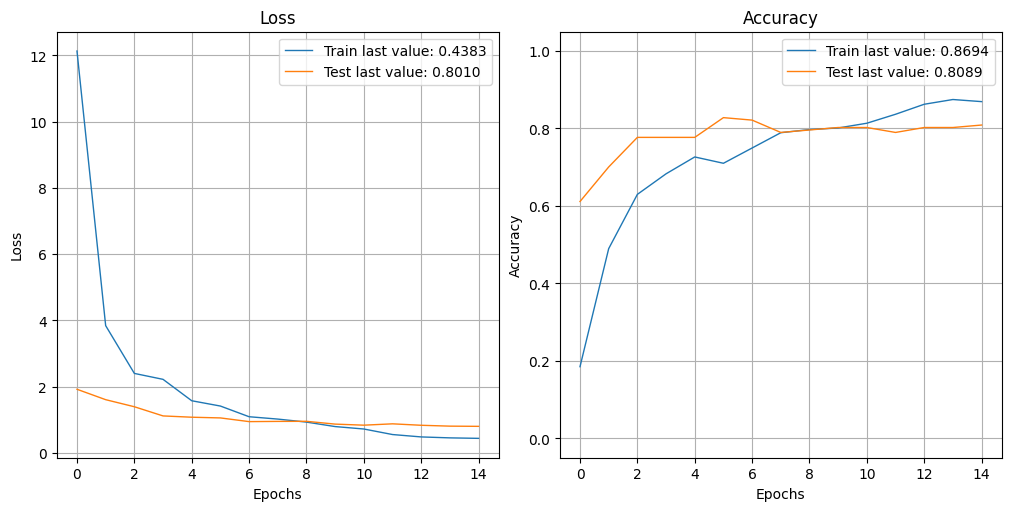

INFO:pycodestyle:6:80: E501 line too long (90 > 79 characters)


In [55]:
# Afficher l'historique de l'entraînement
show_history(history_optimal_tf_vgg16_noDA)

# Définir le chemin d'export de la figure
dossier_figure = "./figure/"
nom_figure = f"history_optimal_tf_vgg16_noDA_batch{str(batch_meilleur_tf_vgg16_noDA)}.png"
chemin_figure_export = os.path.join(dossier_figure, nom_figure)

# Sauvegarder l'historique de l'entraînement
plot_history(history_optimal_tf_vgg16_noDA, path=chemin_figure_export)
plt.close()

### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>c/ Comparatif des accuracy</span>

Nous comparons les accuracy du modèle optimal (Transfer learning avec VGG16) avec les poids du meilleur modèle pour les 3 jeux de données (entrainement, validation et test).

In [56]:
# Charger les poids du meilleur modèle
model_optimal_tf_vgg16_noDA.load_weights(
    "./modele_ML/model_optimal_tf_vgg16_noDA_best_weights.h5")

# Evaluation meilleur modèle sur les données d'entraînement
loss_tf_vgg16_noDA_train, accuracy_tf_vgg16_noDA_train = \
    model_optimal_tf_vgg16_noDA.evaluate(
        X_train_pretraited,
        y_train_pretraited
    )
print("Training Accuracy   :  {:.3f}".format(accuracy_tf_vgg16_noDA_train))

# Evaluation meilleur modèle sur les données de validation
loss_tf_vgg16_noDA_val, accuracy_tf_vgg16_noDA_val = \
    model_optimal_tf_vgg16_noDA.evaluate(
        X_val_pretraited,
        y_val_pretraited
    )
print("Validation Accuracy :  {:.3f}".format(accuracy_tf_vgg16_noDA_val))

# Evaluation meilleur modèle sur les données de test
loss_tf_vgg16_noDA_test, accuracy_tf_vgg16_noDA_test = \
    model_optimal_tf_vgg16_noDA.evaluate(
        X_test_pretraited,
        y_test_pretraited
    )
print("Test Accuracy       :  {:.3f}".format(accuracy_tf_vgg16_noDA_test))

23/23 [==============================] - 8s 343ms/step - loss: 0.0768 - accuracy: 0.9782
Training Accuracy   :  0.978
5/5 [==============================] - 2s 345ms/step - loss: 0.8010 - accuracy: 0.8089
Validation Accuracy :  0.809
5/5 [==============================] - 2s 339ms/step - loss: 0.9863 - accuracy: 0.7911
Test Accuracy       :  0.791


### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>d/ Matrice de confusion</span>

Nous affichons les valeurs réelles et celles prédites par le modèle optimal pour les données de validation.

In [57]:
# Categorie réelle et prédites des images de validation
y_val_num = np.argmax(y_val_pretraited, axis=1)
y_val_pred = np.argmax(
    model_optimal_tf_vgg16_noDA.predict(X_val_pretraited),
    axis=1
)

# Afficher les 30 premières catégories réelles et prédites
print("Categorie reelle : ", y_val_num[:30], "\n")
print("Categorie prédite : ", y_val_pred[:30])

5/5 [==============================] - 2s 419ms/step
Categorie reelle :  [1 5 6 2 5 2 2 6 5 6 5 6 6 2 3 0 3 0 1 6 1 0 6 1 1 1 1 2 6 4] 

Categorie prédite :  [1 5 6 2 5 2 2 6 5 6 5 6 6 2 0 3 3 0 1 6 1 0 6 2 3 1 1 2 6 4]


Nous confirmons les résultats en affichant la matrice de confusion et le rapport de classification.


Correspondance des clusters :  [0 1 2 3 4 5 6]


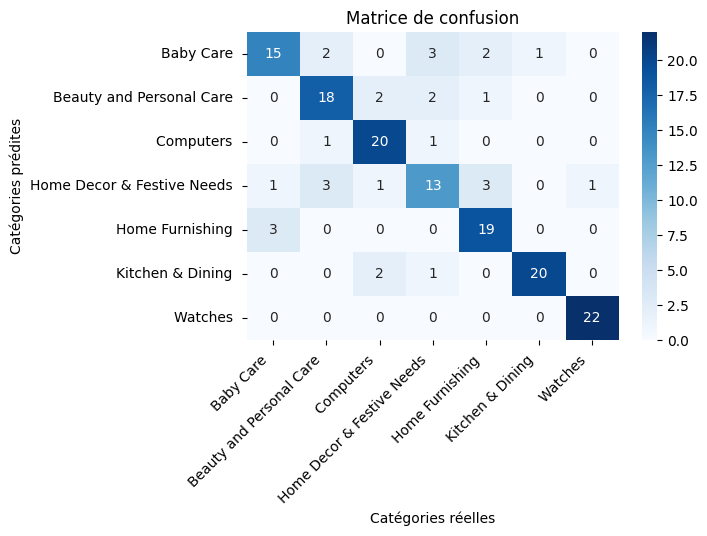

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.75      0.78      0.77        23
           2       0.80      0.91      0.85        22
           3       0.65      0.59      0.62        22
           4       0.76      0.86      0.81        22
           5       0.95      0.87      0.91        23
           6       0.96      1.00      0.98        22

    accuracy                           0.81       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.81      0.81      0.81       157



In [58]:
# Verifier la correspondance des clusters
y_val_pred_transform = conf_mat_transform_argmax(y_val_num, y_val_pred)

# Afficher la matrice de confusion et le rapport de classification
conf_mat_tf_vgg16_noDA = matrice_conf_et_rapport(
    y_val_num,
    y_val_pred_transform,
    categories
    )

### <span style='background:red'>bilan a faire</span>

<div class="alert alert-block alert-success"><b>Bilan: </b> <br>
Le modèle optimal CNN avec transfer learning du VGG16 présente des performances ... </div>

# <span style='background:blue'>Etape 7 : Comparaison des résultats</span>

In [59]:
resultat_naif

,Validation Accuracy,Temps (sec)
Dummy,0.15,1.79e-03


In [67]:
resultat_mlp

,Validation Accuracy,Temps (sec),Epochs,batch_sizes
32,0.14,12.94,15,32
64,0.14,11.11,15,64
128,0.15,9.06,11,128
256,0.14,9.67,15,256
512,0.14,8.97,11,512


In [68]:
batch_sizes

[32, 64, 128, 256, 512]

In [69]:
batch_meilleur_mlp

128

In [78]:
# Verification du format du batch size
print("Verification => batch_meilleur_mlp: ", batch_meilleur_mlp)

if batch_meilleur_mlp > 10:
    batch_meilleur_mlp = batch_sizes.index(
        batch_meilleur_mlp) if batch_meilleur_mlp in batch_sizes else None

print("Validation => batch_meilleur_mlp: ", batch_meilleur_mlp)

# Reformater le dataframe
resultat_optimal_mlp = reformatte_resultat(
    resultat_mlp, batch_sizes, batch_meilleur_mlp, 'mlp')

display(resultat_optimal_mlp)

Verification => batch_meilleur_mlp:  2
Validation => batch_meilleur_mlp:  2


,Validation Accuracy,Temps (sec),Epochs,batch_sizes
mlp,0.15,9.06,11,128


In [80]:
# Verification du format du batch size
print("Verification => batch_meilleur_cnn: ", batch_meilleur_cnn)

if batch_meilleur_cnn > 10:
    batch_meilleur_cnn = batch_sizes.index(
        batch_meilleur_cnn) if batch_meilleur_cnn in batch_sizes else None

print("Validation => batch_meilleur_cnn: ", batch_meilleur_cnn)

# Reformater le dataframe
resultat_optimal_cnn = reformatte_resultat(
    resultat_cnn, batch_sizes, batch_meilleur_cnn, 'cnn')

display(resultat_optimal_cnn)

Verification => batch_meilleur_cnn:  3
Validation => batch_meilleur_cnn:  3


,Validation Accuracy,Temps (sec),Epochs,batch_sizes
cnn,0.44,147.75,15,256


In [84]:
# Verification du format du batch size
print("Verification => batch_meilleur_tf_vgg16_noDA: ",
      batch_meilleur_tf_vgg16_noDA)

if batch_meilleur_tf_vgg16_noDA > 10:
    batch_meilleur_tf_vgg16_noDA = batch_sizes.index(
        batch_meilleur_tf_vgg16_noDA
        ) if batch_meilleur_tf_vgg16_noDA in batch_sizes else None

print("Validation => batch_meilleur_tf_vgg16_noDA: ",
      batch_meilleur_tf_vgg16_noDA)

# Reformater le dataframe
resultat_optimal_tf_vgg16_noDA = reformatte_resultat(
    resultat_tf_vgg16_noDA,
    batch_sizes,
    batch_meilleur_tf_vgg16_noDA,
    'tf_vgg16_noDA'
)

display(resultat_optimal_tf_vgg16_noDA)

Verification => batch_meilleur_tf_vgg16_noDA:  4
Validation => batch_meilleur_tf_vgg16_noDA:  4


,Validation Accuracy,Temps (sec),Epochs,batch_sizes
tf_vgg16_noDA,0.82,136.5,15,512


In [82]:
# Concaténer les trois DataFrames
resultat_optimal_tous = pd.concat([
    resultat_optimal_mlp,
    resultat_optimal_cnn,
    resultat_optimal_tf_vgg16_noDA
], ignore_index=False)

display(resultat_optimal_tous)

,Validation Accuracy,Temps (sec),Epochs,batch_sizes
mlp,0.15,9.06,11,128
cnn,0.44,147.75,15,256
tf_vgg16_noDA,0.82,136.50,15,512


In [83]:
# Surligner les meilleures valeurs
resultat_optimal_tous.style.apply(surligne_meilleur)

,Validation Accuracy,Temps (sec),Epochs,batch_sizes
mlp,0.146497,9.063315,11,128
cnn,0.439490,147.746990,15,256
tf_vgg16_noDA,0.815287,136.498631,15,512


# <span style='background:blue'>Etape 8 : CNN + Transfer learning VGG-16 avec Data Augmentation</span>

Pour cette classification d'image automatique, nous allons utiliser un **réseau de neurones convolutionnels** (*Convolutional Neural Network*, **CNN**). Nous le couplons avec la technique du **transfer learning** pour utiliser le modèle pré-entrainé **VGG-16**. Nous optimisons les performances du modèle en utilisant la technique de **data augmentation**.

## <span style='background:green'>1/ Prétraitement des données</span>

### <span style='background:red'>data augmentation?</span>

La cellule ci-dessous est à activer si les images sont classées par catégories et qu'il faut les mélanger.

In [85]:
# # Pour mélanger les images, classées initalement par classe
# data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [86]:
def data_flow_fct(data, datagen, batch_size):
    """
    Crée un générateur de données à partir d'un DataFrame :
    - data : DataFrame contenant les chemins des images et les labels
    correspondants.
    - directory : str, facultatif. Chemin du répertoire contenant les images.
    Si vide, les chemins des images doivent être absolus.
    - x_col : str, nom de la colonne contenant les chemins des images.
    - y_col : str, nom de la colonne contenant les labels.
    - weight_col : str, facultatif. Nom de la colonne contenant les poids. Si
    None, tous les poids sont égaux.
    - target_size : tuple, taille des images issues de la data augmentation.
    - classes : list, facultatif. Liste des classes à utiliser. Si None, toutes
    les classes seront automatiquement inférées à partir des labels.
    - class_mode : str, type de label à generer. Si categorical alors les
    labels seront des vecteurs one-hot 2D.
    - batch_size : int, taille des batchs.
    - shuffle : bool, mélanger les données à chaque époch.
    - seed : int, graine pour le mélange des données.

    Paramètres :
    - data : DataFrame contenant les chemins des images et les labels
    correspondants.
    - datagen : instance de ImageDataGenerator pour effectuer la data
    augmentation.
    - batch_size : int, taille des batchs.
    - data_type : str, facultatif. Si 'training' ou 'validation', détermine le
    sous-ensemble de données à utiliser.

    Retourne :
    - data_flow : générateur de données.
    """
    data_flow = datagen.flow_from_dataframe(
        data,
        directory='',
        x_col='image',
        y_col='label',
        weight_col=None,
        target_size=(224, 224),
        classes=None,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True,
        seed=42,
    )

    return data_flow

### <span style='background:red'>DEV a partir de la</span>

In [87]:
# nbr_images = 32

# X_train = X_train[:nbr_images]
# y_train = y_train[:nbr_images]

# X_val = X_val[:nbr_images]
# y_val = y_val[:nbr_images]

# X_test = X_test[:nbr_images]
# y_test = y_test[:nbr_images]

In [88]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_val.shape)
# print(y_val.shape)
# print(X_test.shape)
# print(y_test.shape)
# X_train[:10]

In [89]:
# y_train

Nous préparons les données

In [90]:
# Agglomeration des images et labels
df_train_combined = pd.DataFrame({"image": X_train, "label": y_train})
df_val_combined = pd.DataFrame({"image": X_val, "label": y_val})
df_test_combined = pd.DataFrame({"image": X_test, "label": y_test})

# Convertir les labels en chaînes de caractères
df_train_combined['label'] = df_train_combined['label'].astype(str)
df_val_combined['label'] = df_val_combined['label'].astype(str)
df_test_combined['label'] = df_test_combined['label'].astype(str)

Nous créeons l'instance de l'objet **ImageDataGenerator** pour la **data augmentation** avec les paramètres suivants :

In [91]:
# Création d'un générateur de données pour les images d'entraînement
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

# Création générateur de données pour images validation et test (pas de DA)
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

Nous appellons la foncion **data_flow_fct** pour créer les générateurs de données d'entrainement et de validation.

In [92]:
# Application du generateur de donnees sur le jeu d'entrainement
train_flow = data_flow_fct(
    df_train_combined,
    datagen_train,
    batch_size=batch_sizes[batch_meilleur_tf_vgg16_noDA]
)

# Application du generateur de donnees sur le jeu de validation
val_flow = data_flow_fct(
    df_val_combined,
    datagen_test,
    batch_size=batch_sizes[batch_meilleur_tf_vgg16_noDA]
)

# Application du generateur de donnees sur le jeu de test
test_flow = data_flow_fct(
    df_test_combined,
    datagen_test,
    batch_size=batch_sizes[batch_meilleur_tf_vgg16_noDA]
)

Found 735 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.
Found 158 validated image filenames belonging to 7 classes.


Nous utilisons les générateurs de données pour entrainer le modèle.

In [93]:
# # Entrainement des generateur de donnees
# datagen_train.fit(df_train_combined)

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# # datagen.fit(X_train)
# # fits the model on batches with real-time data augmentation:

## <span style='background:green'>2/ Elaboration du modèle</span>

### <span style='background:black'>a/ Architecture</span>

Nous créons un modèle de classification d'images CNN en réalisant un **transfer learning** à partir du modèle VGG16 identique à celui de l'étape précédente.

### <span style='background:black'>b/ Compilation et métrique d'évaluation</span>

Le modèle est compilé avec les mêmes paramètres que précedemment, à savoir :
- la fonction de perte '**categorical_crossentropy**'

- l'optimiseur '**rmsprop**'

- la métrique d'évaluation '**accuracy**'

### <span style='background:black'>c/ Callbacks</span>

Nous utilisons les mêmes callbacks que précedemment, à savoir :

- **ModelCheckpoint** pour sauvegarder le meilleur modèle pendant l'entrainement.

- **EarlyStopping** pour arrêter l'entrainement si val_loss (la perte du jeu de validation) ne diminue plus après 3 epochs.

### <span style='background:black'>d/ Indicateur supplémentaire</span>

Nous utilisons le même indicateur supplémentaire que précedemment, à savoir le **temps de calcul**.

### <span style='background:black'>e/ Optimisation hyperparamètre</span>

Nous utilisont les mêmes paramètres que précedemment, à savoir :
- epochs = 15
- batch_size = 32, 64, 128, 256 et 512

In [98]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
print("Connected to TPU: ", resolver.master())

tf.config.experimental_connect_to_cluster(resolver)
print("Cluster connected")

tf.tpu.experimental.initialize_tpu_system(resolver)
print("TPU system initialized")

strategy = tf.distribute.TPUStrategy(resolver)
print("TPU Strategy: ", strategy)

Connected to TPU:  grpc://10.23.82.114:8470
Cluster connected


INFO:pycodestyle:1:80: E501 line too long (106 > 79 characters)


TPU system initialized
TPU Strategy:  <tensorflow.python.distribute.tpu_strategy.TPUStrategyV2 object at 0x7c1cc0ae2800>


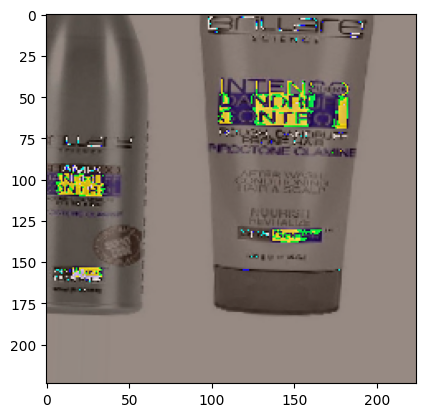


 ============================== batch_size : 32 ==============================
Epoch 1/15


InternalError: 9 root error(s) found.
  (0) INTERNAL: {{function_node __inference_train_function_57113}} failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused
Additional GRPC error information from remote target /job:localhost/replica:0/task:0/device:CPU:0:
:UNKNOWN:failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused {grpc_status:14, created_time:"2024-02-01T09:49:40.486726392+00:00"}
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
Executing non-communication op <MultiDeviceIteratorGetNextFromShard> originally returned UnavailableError, and was replaced by InternalError to avoid invoking TF network error handling logic.
	 [[RemoteCall]]
	 [[IteratorGetNextAsOptional]]
	 [[strided_slice_75/_318]]
  (1) INTERNAL: {{function_node __inference_train_function_57113}} failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused
Additional GRPC error information from remote target /job:localhost/replica:0/task:0/device:CPU:0:
:UNKNOWN:failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused {grpc_status:14, created_time:"2024-02-01T09:49:40.486726392+00:00"}
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
Executing non-communication op <MultiDeviceIteratorGetNextFromShard> originally returned UnavailableError, and was replaced by InternalError to avoid invoking TF network error handling logic.
	 [[RemoteCall]]
	 [[IteratorGetNextAsOptional]]
	 [[strided_slice_56/_292]]
  (2) INTERNAL: {{function_node __inference_train_function_57113}} failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused
Additional GRPC error information from remote target /job:localhost/replica:0/task:0/device:CPU:0:
:UNKNOWN:failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused {grpc_status:14, created_time:"2024-02-01T09:49:40.486726392+00:00"}
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
Executing non-communication op <MultiDeviceIteratorGetNextFromShard> originally returned UnavailableError, and was replaced by InternalError to avoid invoking TF network error handling logic.
	 [[RemoteCall]]
	 [[IteratorGetNextAsOptional]]
	 [[strided_slice_120/_368]]
  (3) INTERNAL: {{function_node __inference_train_function_57113}} failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused
Additional GRPC error information from remote target /job:localhost/replica:0/task:0/device:CPU:0:
:UNKNOWN:failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:38815: Failed to connect to remote host: Connection refused {grpc_status:14, created_time:"2024-02-01T09:49:40.486726392+00:00"}
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
Execu ... [truncated]

In [100]:
# Générer un lot d'images
images, labels = next(train_flow)

# Afficher la première image du lot
plt.imshow(images[0].astype('uint8'))
plt.show()

# Créer des dictionnaires vides pour stocker l'historique, temps, epochs
history_dict, time_dict, epoch_dict = {}, {}, {}

# POUR chaque batch_size
for batch_size in batch_sizes:
    print("\n", "=" * 30, "batch_size :", batch_size, "=" * 30)

    # Créer un modèle CNN
    model_tf_vgg16_DA = creation_modele_transfer_vgg16(
        fonction_perte,
        optimiseur,
        metric_eval,
    )

    # Création des callbacks
    callbacks_list, chemin_modele_export = creer_callbacks(
        "model_tf_vgg16_DA",
        patience,
        batch_size
    )

    # Enregistrer le temps de début
    start_time = time.time()

    # Entraîner le modèle
    history_tf_vgg16_DA = model_tf_vgg16_DA.fit(
        train_flow,
        steps_per_epoch=len(X_train) // batch_size,
        epochs=15,
        callbacks=callbacks_list,
        validation_data=val_flow,
        validation_steps=len(X_val) // batch_size,
        verbose=1
    )

    # Enregistrer le temps de fin
    end_time = time.time()

    # Calculer le temps d'entraînement
    training_time = end_time - start_time
    print(f"\n=> Temps d'entraînement : {round(training_time, 2)} sec <=")

    # Calculer le nombre d'epochs
    epochs = len(history_tf_vgg16_DA.history['loss'])

    # Stocker l'historique, le temps d'entraînement et le nombre d'epochs
    history_dict[batch_size] = history_tf_vgg16_DA.history
    time_dict[batch_size] = training_time
    epoch_dict[batch_size] = epochs

Comparons les résultats obtenus pour les différents batch_size :

In [ ]:
# Créer un DataFrame à partir de l'historique
resultat_tf_vgg16_DA = pd.DataFrame(
    {k: v['val_accuracy'][-1] for k, v in history_dict.items()},
    index=[0]
    )

# Transposer le DataFrame (batch_sizes en index)
resultat_tf_vgg16_DA = resultat_tf_vgg16_DA.transpose()

# Renommer la colonne
resultat_tf_vgg16_DA.columns = ['Validation Accuracy']

# Ajouter les temps d'entraînement et nombre d'epoch au DataFrame
resultat_tf_vgg16_DA['Temps (sec)'] = pd.Series(time_dict)
resultat_tf_vgg16_DA['Epochs'] = pd.Series(epoch_dict)

# Afficher le batch_size avec la meilleure accuracy de validation
batch_meilleur_tf_vgg16_DA = resultat_tf_vgg16_DA[
    'Validation Accuracy'].idxmax()
print(f"\nMeilleur batch_size (accuracy): {batch_meilleur_tf_vgg16_DA}")

# Surligner les meilleures valeurs
resultat_tf_vgg16_DA.style.apply(surligne_meilleur)

### <span style='background:red'>bilan a faire</span>

## <span style='background:green'>3/ Modèle optimal</span>

### <span style='background:black'>a/Création et entrainement</span>

Nous entrainons à nouveau le modèle avec le bon batch_size pour obtenir le modèle optimal.

In [ ]:
# Nom du fichier history
history_tf_vgg16_DA_file = 'history_optimal_tf_vgg16_DA.pickle'

# SI le fichier history existe
if os.path.exists(history_tf_vgg16_DA_file):

    # ALORS le charger car les calculs sont deja fait
    with open(history_tf_vgg16_DA_file, 'rb') as f:
        history_optimal_tf_vgg16_DA = pickle.load(f)
    print("History chargé à partir du fichier.")

# SINON on realise les calculs
else:
    print("On fait les calculs.")

    # # Utiliser le GPU
    # with tf.device('/gpu:0'):

    # Créer le modèle optimal de tranfer learning VGG16
    model_optimal_tf_vgg16_DA = creation_modele_transfer_vgg16(
        fonction_perte,
        optimiseur,
        metric_eval,
    )

    # Création des callbacks
    callbacks_list, chemin_modele_export = creer_callbacks(
        "model_optimal_tf_vgg16_DA",
        patience,
    )

    # Entraîner le modèle avec batch_meilleur_tf_vgg16_DA
    history_optimal_tf_vgg16_DA = model_optimal_tf_vgg16_DA.fit(
        train_flow,
        steps_per_epoch=len(X_train) // batch_size,
        epochs=15,
        batch_size=batch_meilleur_tf_vgg16_DA,
        callbacks=callbacks_list,
        validation_data=val_flow,
        validation_steps=len(X_val) // batch_size,
        verbose=1
        )

    # Sauvegarder l'objet history
    with open(history_tf_vgg16_DA_file, 'wb') as f:
        pickle.dump(history_optimal_tf_vgg16_DA.history, f)

### <span style='background:black'>b/ Plot loss et accuracy</span>

Nous affichons l'évolution de la perte et de l'accuracy pour le jeu d'entrainement et le jeu de validation au cours des epoch.

In [ ]:
# Afficher l'historique de l'entraînement
show_history(history_optimal_tf_vgg16_DA)

# Definir le chemin d'export de la figure
dossier_figure = "./figure/"
nom_figure = f"history_optimal_tf_vgg16_DA_batch{batch_meilleur_tf_vgg16_DA}.png"
chemin_figure_export = os.path.join(dossier_figure, nom_figure)

# Sauvegarder l'historique de l'entraînement
plot_history(history_optimal_tf_vgg16_DA, path=chemin_figure_export)
plt.close()

### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>c/ Comparatif des accuracy</span>

Nous comparons les accuracy du modèle optimal (Transfer learning avec VGG16) avec les poids du meilleur modèle pour les 3 jeux de données (entrainement, validation et test).

In [ ]:
# Charger les poids du meilleur modèle
model_optimal_tf_vgg16_DA.load_weights(chemin_modele_export)

# Evaluation meilleur modèle sur les données d'entraînement
loss_tf_vgg16_DA_train, accuracy_tf_vgg16_DA_train = \
    model_optimal_tf_vgg16_DA.evaluate(
        X_train_pretraited,
        y_train_pretraited
)
print("Training Accuracy   :  {:.3f}".format(accuracy_tf_vgg16_DA_train))

# Evaluation meilleur modèle sur les données de validation
loss_tf_vgg16_DA_val, accuracy_tf_vgg16_DA_val = \
    model_optimal_tf_vgg16_DA.evaluate(
        X_val_pretraited,
        y_val_pretraited
)
print("Validation Accuracy :  {:.3f}".format(accuracy_tf_vgg16_DA_val))

# Evaluation meilleur modèle sur les données de test
loss_tf_vgg16_DA_test, accuracy_tf_vgg16_DA_test = \
    model_optimal_tf_vgg16_DA.evaluate(
        X_test_pretraited,
        y_test_pretraited
)
print("Test Accuracy       :  {:.3f}".format(accuracy_tf_vgg16_DA_test))

### <span style='background:red'>bilan a faire</span>

### <span style='background:black'>d/ Matrice de confusion</span>

Nous affichons les valeurs réelles et celles prédites par le modèle optimal pour les données de validation.

In [ ]:
# Categorie réelle et prédites des images de validation
y_val_num = np.argmax(y_val_pretraited, axis=1)
y_val_pred = np.argmax(
    model_optimal_tf_vgg16_DA.predict(X_val_pretraited),
    axis=1
)

# Afficher les 30 premières catégories réelles et prédites
print("Categorie reelle : ", y_val_num[:30], "\n")
print("Categorie prédite : ", y_val_pred[:30])

Nous confirmons les résultats en affichant la matrice de confusion et le rapport de classification.

In [ ]:
# Verifier la correspondance des clusters
y_val_pred_transform = conf_mat_transform_argmax(y_val_num, y_val_pred)

# Afficher la matrice de confusion et le rapport de classification
conf_mat_tf_vgg16_DA = matrice_conf_et_rapport(
    y_val_num,
    y_val_pred_transform,
    categories
    )

### <span style='background:red'>bilan a faire</span>

<div class="alert alert-block alert-success"><b>Bilan: </b> <br>
Le modèle optimal CNN avec transfer learning du VGG16 et Data Augmentation présente des performances ... </div>

# <span style='background:blue'>Etape 9 : Comparaison des résultats</span>

# <span style='background:blue'>Conclusion</span>

ici

In [ ]:
# Afficher temps d'exécution du notebook
calculer_duree_notebook(start_time)

Compétence OCR:

**Définir la stratégie d’élaboration d’un modèle d'apprentissage profond, concevoir ou ré-utiliser des modèles pré-entraînés (transfer learning) et entraîner des modèles afin de réaliser une analyse prédictive.**
- ~~CE1 Le candidat a défini sa stratégie d’élaboration d’un modèle pour répondre à un besoin métier (par exemple : choix de conception d’un modèle ou ré-utilisation de modèles pré-entraînés).~~
- ~~CE2 Le candidat a identifié la ou les cibles.~~
- ~~CE3 Le candidat a réalisé la séparation du jeu de données en jeu d’entraînement, jeu de validation et jeu de test.~~
- ~~CE4 Le candidat s'est assuré qu'il n’y a pas de fuite d’information entre les jeux de données (entraînement, validation et test).~~
- ~~CE5 Le candidat a testé plusieurs modèles d’apprentissage profond (par exemple à l’aide de la librairie Tensorflow / Keras) en partant du plus simple vers les plus complexes.~~
- ~~CE6 Le candidat a mis en oeuvre des modèles à partir de modèles pré-entraînés (technique de Transfer Learning)~~

**Évaluer la performance des modèles d’apprentissage profond selon différents critères (scores, temps d'entraînement, etc.) afin de choisir le modèle le plus performant pour la problématique métier.**
- ~~CE1 Le candidat a choisi une métrique adaptée à la problématique métier, et sert à évaluer la performance des modèles~~
- ~~CE2 Le candidat a explicité le choix de la métrique d’évaluation~~
- CE3 Le candidat a évalué la performance d’un modèle de référence et sert de comparaison pour évaluer la performance des modèles plus complexes
- ~~CE4 Le candidat a calculé, hormis la métrique choisie, au moins un autre indicateur pour comparer les modèles (par exemple : le temps nécessaire pour l’entraînement du modèle)~~
- ~~CE5 Le candidat a optimisé au moins un des hyperparamètres du modèle choisi (par exemple : le choix de la fonction Loss, le Batch Size, le nombre d'Epochs)~~

**Utiliser des techniques d’augmentation des données afin d'améliorer la performance des modèles.**
- CE1 Le candidat a utilisé plusieurs techniques d’augmentation des données (ex. pour des images : rotation, changement d’échelle, ajout de bruit…).
- CE2 Le candidat a présenté une synthèse comparative des améliorations de performance grâce aux différentes techniques d'augmentation de données utilisées (maîtrise de l’overfitting, meilleur score).